In [0]:
# Data Source

#https://catalog.data.gov/dataset/consumer-complaint-database/resource/484bc506-82b0-4225-ab10-496cf7a1c2e9


In [1]:
# import pandas as pd
# 
!wget -nc https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD

--2019-09-11 04:25:27--  https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD
Resolving data.consumerfinance.gov (data.consumerfinance.gov)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.consumerfinance.gov (data.consumerfinance.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [               <=>  ] 788.43M  4.71MB/s    in 1m 44s  

2019-09-11 04:27:16 (7.57 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [826728275]



In [0]:
!mv rows.csv?accessType=DOWNLOAD data.csv

In [0]:
!cat /etc/os-release

NAME="Ubuntu"
VERSION="18.04.2 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.2 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
VERSION_CODENAME=bionic
UBUNTU_CODENAME=bionic


In [3]:
import pandas as pd
df = pd.read_csv('data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.memory_usage(deep=True).sum()

1788838721

In [4]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1379178,12/01/2011,Credit card,NaN,Billing disputes,NaN,NaN,NaN,JPMORGAN CHASE & CO.,OH,43207,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2126
1379179,12/01/2011,Credit card,NaN,Other,NaN,NaN,NaN,SYNCHRONY FINANCIAL,TN,383XX,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2243
1379180,12/01/2011,Credit card,NaN,Balance transfer,NaN,NaN,NaN,JPMORGAN CHASE & CO.,FL,34997,NaN,NaN,Referral,12/01/2011,Closed with relief,Yes,No,2154
1379181,12/01/2011,Credit card,NaN,Other,NaN,NaN,NaN,"CITIBANK, N.A.",TX,77389,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2270
1379182,12/01/2011,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,NaN,"CITIBANK, N.A.",NV,89415,NaN,NaN,Web,12/19/2011,Closed without relief,Yes,No,2240


In [5]:
df.shape

(1379183, 18)

In [0]:
# Remove all rows where consumer complaint narrative is not present
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [7]:
df.shape

(437315, 18)

In [0]:
df.memory_usage(deep=True).sum()

849701412

In [0]:
#df = df.sample(frac=0.25)

In [0]:
# a=list(range(10))
# for i in range(13):
#   a[i]

In [0]:
%debug

--KeyboardInterrupt--


In [0]:
# from google.colab import drive
# drive.mount('/gdrive')

In [0]:
# with open('/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat '/gdrive/My Drive/foo.txt'

In [0]:
from io import StringIO

In [0]:
col = ['Product', 'Consumer complaint narrative']

In [10]:
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [0]:
df = df.sample(frac=0.25)

In [12]:
df.shape

(109329, 2)

In [0]:
df=df.rename(columns={'Consumer complaint narrative':'Consumer_complaint_narrative'})

In [14]:
df.columns

Index(['Product', 'Consumer_complaint_narrative'], dtype='object')

In [15]:
set(df['Product'])

{'Bank account or service',
 'Checking or savings account',
 'Consumer Loan',
 'Credit card',
 'Credit card or prepaid card',
 'Credit reporting',
 'Credit reporting, credit repair services, or other personal consumer reports',
 'Debt collection',
 'Money transfer, virtual currency, or money service',
 'Money transfers',
 'Mortgage',
 'Other financial service',
 'Payday loan',
 'Payday loan, title loan, or personal loan',
 'Prepaid card',
 'Student loan',
 'Vehicle loan or lease',
 'Virtual currency'}

In [16]:
df['category_id'] = df['Product'].factorize()[0]  # encode for categorical values
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()


,Product,Consumer_complaint_narrative,category_id
889951,Credit card,I really need CITI to lower my interest rate f...,0
525177,"Credit reporting, credit repair services, or o...",I was a victim of identity theft and in turn t...,1
509765,"Credit reporting, credit repair services, or o...",I am writing to dispute the following informat...,1
472038,Debt collection,The XXXX 's visit in question and billed for {...,2
546403,Student loan,over the life of the private loan for my class...,3


In [17]:
set(df['category_id'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [18]:
category_id_df

,Product,category_id
889951,Credit card,0
525177,"Credit reporting, credit repair services, or o...",1
472038,Debt collection,2
546403,Student loan,3
639775,Bank account or service,4
93757,Credit card or prepaid card,5
699233,Payday loan,6
902001,Mortgage,7
695069,Credit reporting,8
582032,Checking or savings account,9


In [19]:
category_to_id

{'Bank account or service': 4,
 'Checking or savings account': 9,
 'Consumer Loan': 11,
 'Credit card': 0,
 'Credit card or prepaid card': 5,
 'Credit reporting': 8,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Debt collection': 2,
 'Money transfer, virtual currency, or money service': 12,
 'Money transfers': 14,
 'Mortgage': 7,
 'Other financial service': 16,
 'Payday loan': 6,
 'Payday loan, title loan, or personal loan': 13,
 'Prepaid card': 15,
 'Student loan': 3,
 'Vehicle loan or lease': 10,
 'Virtual currency': 17}

In [20]:
id_to_category

{0: 'Credit card',
 1: 'Credit reporting, credit repair services, or other personal consumer reports',
 2: 'Debt collection',
 3: 'Student loan',
 4: 'Bank account or service',
 5: 'Credit card or prepaid card',
 6: 'Payday loan',
 7: 'Mortgage',
 8: 'Credit reporting',
 9: 'Checking or savings account',
 10: 'Vehicle loan or lease',
 11: 'Consumer Loan',
 12: 'Money transfer, virtual currency, or money service',
 13: 'Payday loan, title loan, or personal loan',
 14: 'Money transfers',
 15: 'Prepaid card',
 16: 'Other financial service',
 17: 'Virtual currency'}

In [0]:
df.memory_usage(deep=True).sum()

117976287

# Balance of classes

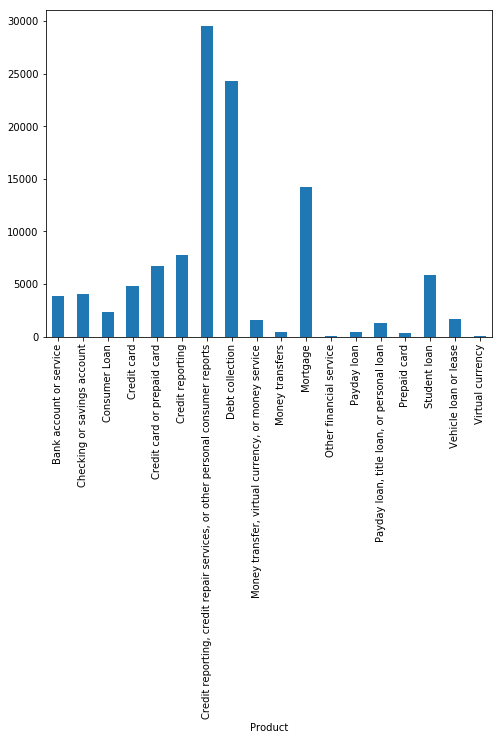

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
                 
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [0]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        1481        8328           0        3212       11627
Swap:             0           0           0


Biased towards Credit reporting, debt collection and mortgage as they are very high in number. 

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

We will use the bag of words model to process the text complaint narraitive. It is a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

Term Frequency, Inverse Document Frequency, (tf-idf) is used as a calculative measure for this.

It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Used as a weighting factor in searches of information retrieval, text mining, and user modeling. 

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. 

Tf–idf is one of the most popular term-weighting schemes today; 83% of text-based recommender systems in digital libraries use tf–idf.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
%whos   # what variables exist in memory

No variables match your requested type.


In [0]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1, 2), 
                        stop_words='english')

In [0]:
features = tfidf.fit_transform(df.Consumer_complaint_narrative)#.toarray()

In [26]:
features

<109329x248389 sparse matrix of type '<class 'numpy.float64'>'
	with 11816813 stored elements in Compressed Sparse Row format>

In [27]:
labels = df.category_id
features.shape

(109329, 248389)

sublinear_df is set to True to use a logarithmic form for frequency.


min_df is the minimum numbers of documents a word must be present in to be kept.


norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.

ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams. 


stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products

The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

In [28]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Checking or savings account':
  . Most correlated unigrams:
. overdraft
. deposit
  . Most correlated bigrams:
. overdraft fees
. checking account
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. vehicle
  . Most correlated bigrams:
. santander consumer
. auto loan
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. express
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Credit reporting':
  . Most correlated unigrams:
. equifax
. experian
  . Most correlated bigrams:
. disputed resolve
. manner soon
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. inquiries
. equifax
  . Most correlated bigrams:
. mistakes appear

## Multi-Class Classifier: Features and Design

To train supervised classifiers, we first transformed the “Consumer complaint narrative” into a vector of numbers. We explored vector representations such as TF-IDF weighted vectors.


After having this vector representations of the text we can train supervised classifiers to train unseen “Consumer complaint narrative” and predict the “product” on which they fall.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [31]:
X_train_counts

<81996x53000 sparse matrix of type '<class 'numpy.int64'>'
	with 7477570 stored elements in Compressed Sparse Row format>

In [32]:
X_train_tfidf

<81996x53000 sparse matrix of type '<class 'numpy.float64'>'
	with 7477570 stored elements in Compressed Sparse Row format>

In [0]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [34]:
#make predictions - 
# Debt collection
print(clf.predict(count_vect.transform(
    ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [35]:
# Credit Reporting
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


,Product,Consumer_complaint_narrative,category_id
57020,"Credit reporting, credit repair services, or o...",This is my second complaint with the CFPB abou...,0
66508,"Credit reporting, credit repair services, or o...",I am concerned about the validity and accuracy...,0
95939,"Credit reporting, credit repair services, or o...","I am an identity theft victim, I had an accoun...",0
56625,Credit card or prepaid card,"hello good morning, I am presenting a new repo...",1
91989,Debt collection,XXXX XXXX has hired Stenger & Stenger to colle...,2


In [36]:
print(df.iloc[3000])

Product                                                                  Mortgage
Consumer_complaint_narrative    in XX/XX/XXXXwe were doing banking at our loca...
category_id                                                                     7
Name: 529673, dtype: object


In [37]:
print(df.iloc[3000, 1])

in XX/XX/XXXXwe were doing banking at our local 5/3. An extremely aggressive loan officer approached us & asked if we were interested in equity lines. We were n't but sounded intriguing. Long story short we took out lines on several paid up properties that we owned. NO appraisals were ever done. In retrospect WORST MISTAKE OF OUR LIFE!
We have faithfully paid on these for 13 years. We are in our XXXX 's & now difficult to make these payments. We asked 5/3 for help. We worked with XXXX XXXX, Office of the President & it truly sounded as if we could get relief. We jumped through hoops & completed all of the requirements for a loan modification. Worked with XXXX XXXX, Senior Vice President -- all along he said our application was pending. We had 3 equity lines which for sure most likely were fraudulently appraised -- or not appraised at all. We have articles showing that 5/3 made bad loans between XX/XX/XXXXtoXX/XX/XXXX In return 5/3 accepted {$3.00} billion in federal money from the Trou

In [38]:
print(clf.predict(count_vect.transform([df.iloc[3000, 1]])))

['Mortgage']


## Model Selection 

We will benchmark the following four models:


Logistic Regression - Works with probability. Sigmoid where above 50 % is positive and less than 50% is negative. 


(Multinomial) Naive Bayes - Based on pure probability. P(A|X) vs P(B|X) vs P(C|X).
Internalls it is based on some independent assumptions. 


Linear Support Vector Machine - since 1960s with considerable enhancements. 
Support vectors are colsely related to opposite scenario and form the Maximum margin with positive and negative hyperplane.


Random Forest - Ensamble Algorithm - Pick k data points and build a decision tree with them Make lots of algorithms together on different k data points, might be that all algorithms are same algorithms. Finally, take the mean/median/mode of all the algorithms.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


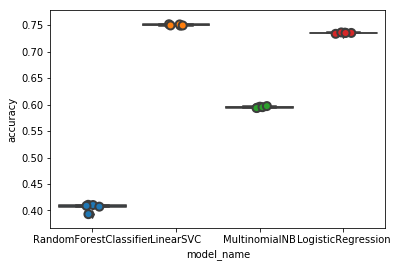

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


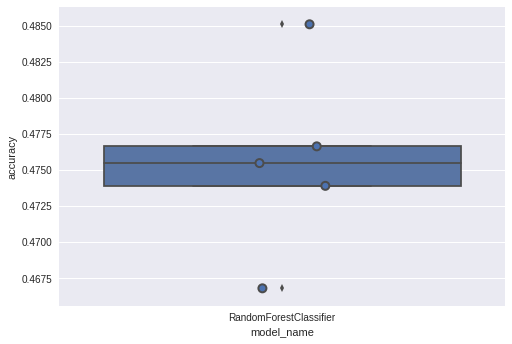

In [0]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import cross_val_score
# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0),
# #     LinearSVC(),
# #     MultinomialNB(),
# #     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

In [42]:
accuracies

array([0.73600951, 0.73544611, 0.73377544, 0.73637029, 0.73528201])

In [0]:
#models[0].feature_importances_()

NotFittedError: ignored

In [41]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.750313
LogisticRegression        0.735377
MultinomialNB             0.595222
RandomForestClassifier    0.405958
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 81%.

Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

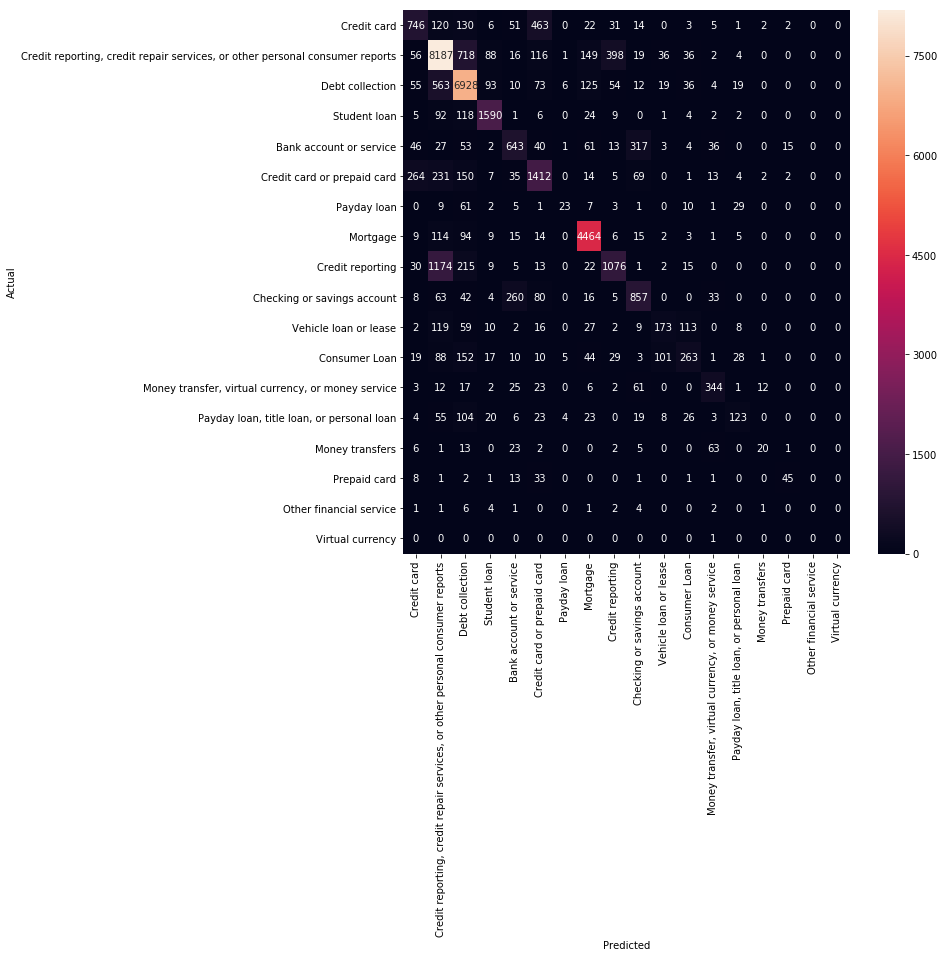

In [43]:

model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

The vast majority of the predictions end up on the diagonal (predicted label = actual label), where we want them to be. However, there are a number of misclassifications, and it might be interesting to see what those are caused by


In [44]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card' : 56 examples.


,Product,Consumer_complaint_narrative
125509,"Credit reporting, credit repair services, or o...",BOA reports a credit card account to XXXX even...
390138,"Credit reporting, credit repair services, or o...","Chase Card has "" charged-off '' my balance for..."
83185,"Credit reporting, credit repair services, or o...",Reviewed credit report and saw a number a hard...
597855,"Credit reporting, credit repair services, or o...",When Costco made the change fro m Amex to Vi...
334211,"Credit reporting, credit repair services, or o...",My XXXX credit card was used fraudulently in ...
465359,"Credit reporting, credit repair services, or o...",Company : XXXX XXXX XXXX A dispute of fraudule...
413334,"Credit reporting, credit repair services, or o...",On about XXXX of 2017 my credit card by XXXX X...
25690,"Credit reporting, credit repair services, or o...",Ran credit report and found account opened in ...
190941,"Credit reporting, credit repair services, or o...","Dear Sir/Madan, We reported Credit Card lost i..."
552775,"Credit reporting, credit repair services, or o...",On my XXXX XXXX account there is a reference t...



'Debt collection' predicted as 'Credit card' : 55 examples.


,Product,Consumer_complaint_narrative
100171,Debt collection,Bank Of America ( The creditor ) agreed to del...
881286,Debt collection,My Macy 's credit card was stolen on XXXX XXXX...
748849,Debt collection,I have an account with Synchrony bank/JCP that...
787710,Debt collection,The bank opened an account for someone other t...
447172,Debt collection,"On XXXX XXXX, XXXX I received a letter in the ..."
967787,Debt collection,I request a dispute with dtv XXXX service with...
699107,Debt collection,I received an email account status alert from ...
772131,Debt collection,I am five days late paying my Macy 's card. I ...
604344,Debt collection,I tried to clear debt up to remove negative re...
808950,Debt collection,i opened a discover card in my name in XXXX it...



'Bank account or service' predicted as 'Credit card' : 46 examples.


,Product,Consumer_complaint_narrative
724465,Bank account or service,On XXXX/XXXX/2016 I attempted to use my eppica...
954846,Bank account or service,Citi credit card closed XXXX of my accounts fo...
692603,Bank account or service,Sun Bank credit card makes Due Date impossible...
983354,Bank account or service,I made a deposit to Bank of America on XXXX/XX...
803737,Bank account or service,I used my card to order a product over the pho...
794152,Bank account or service,"Hi, I had a checking account at Citi and have ..."
881840,Bank account or service,I have paid my Macy 's account balance XXXX se...
881887,Bank account or service,I found out that PayPal has done a credit inqu...
803395,Bank account or service,Below is a weblink which Bank of America repea...
952256,Bank account or service,"On XXXX XXXX, 2015, I was making a purchase at..."



'Credit card or prepaid card' predicted as 'Credit card' : 264 examples.


,Product,Consumer_complaint_narrative
527153,Credit card or prepaid card,Some one opened a Fraudulent Credit Card accou...
577490,Credit card or prepaid card,I am reaching out with some issues I have been...
551624,Credit card or prepaid card,So on XXXX XXXX while at XXXX XXXX Course I no...
159531,Credit card or prepaid card,"Hello, I called My bank Pentagon Federal credi..."
561709,Credit card or prepaid card,"Last Monday XXXX XXXX , Chase bank decided ..."
458029,Credit card or prepaid card,I signed up with Barclay Mastercard with paper...
487928,Credit card or prepaid card,Access to Citibank 's website has been denied ...
184200,Credit card or prepaid card,Mail offer for 0 % 18 months on purchases and ...
453572,Credit card or prepaid card,USAA applied payment to a 0 % promotional bala...
499125,Credit card or prepaid card,I went to XXXX to make some purchases at the e...



'Credit reporting' predicted as 'Credit card' : 30 examples.


,Product,Consumer_complaint_narrative
682848,Credit reporting,My credit dropped down XXXX-XXXX point in all ...
630542,Credit reporting,My credit card with XXXX XXXX was charged off ...
873567,Credit reporting,I have a Value City Furniture Synchrony credit...
945600,Credit reporting,My score was XXXX then turned to XXXX sudenly ...
612315,Credit reporting,I opened a JC Penny credit card at a JCP stor...
767078,Credit reporting,I got a notice thru XXXX that I had opened a c...
1005140,Credit reporting,Do n't ever recall having or doing anything in...
767198,Credit reporting,I was scammed into signing up for the timeshar...
640397,Credit reporting,I never applied for this and it is not mine ne...
950388,Credit reporting,I obtain services from XXXX a while I cancel t...



'Consumer Loan' predicted as 'Credit card' : 19 examples.


,Product,Consumer_complaint_narrative
888882,Consumer Loan,I have a credit card with Elan Financial Servi...
897487,Consumer Loan,I purchased a XXXX XXXX from a well known nati...
881693,Consumer Loan,Care Credit XXXX Synchrony Financial XXXX reli...
888020,Consumer Loan,Company took XXXX payments of {$110.00} on XXX...
730912,Consumer Loan,"The financial institution I am dealing with, C..."
636938,Consumer Loan,This is a complaint against EBAY and PAYPAL ( ...
889495,Consumer Loan,XXXX lost XXXX payments I made. I filed a clai...
951334,Consumer Loan,I have used PayPal Credit on line for a few pu...
961794,Consumer Loan,I have attached a detailed letter outlining th...
738205,Consumer Loan,I was shocked when I reviewed my credit report...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 120 examples.


,Product,Consumer_complaint_narrative
790330,Credit card,Dear Agency : 1. RESPONDENT ( S ) failed to re...
712717,Credit card,USAA Savings Bank reduced my credit limit to X...
939663,Credit card,I was a Discover holder from XX/XX/XXXX to XX/...
901330,Credit card,Open a charge account with XXXX ward back in X...
866783,Credit card,I am once again reaching out and requesting yo...
890110,Credit card,I had an account with Kay Jewelers and it was ...
622733,Credit card,This is a follow up to my earlier complaint I ...
979638,Credit card,I have credit cards on my credit report as far...
874341,Credit card,XX/XX/XXXX I was waiting results of XXXX heari...
738344,Credit card,"XXXX, XXXX charged me {$4500.00} to provide so..."



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 563 examples.


,Product,Consumer_complaint_narrative
309947,Debt collection,I submitted an FTC report to all 3 credit bure...
356769,Debt collection,XXXX XXXX is reporting this account to Transun...
160524,Debt collection,XXXX XXXX XXXX has been contacting me regardin...
64107,Debt collection,i had a delinquent account with capital one cr...
688833,Debt collection,I spoke with legal advisory person and sent to...
94713,Debt collection,XXXX XXXX XXXX is reporting incorrectly on my ...
79173,Debt collection,In XXXX of 2019 I paid my balance in full of {...
470961,Debt collection,"XXXX, The amount is {$70.00} I called the util..."
332086,Debt collection,I HAVE MADE PAYMENTS TO 2 PORTFOLIO RECOVERY A...
246685,Debt collection,XXXX XXXX XXXX ACCOUNT XXXX XXXX XXXX XXXX Thi...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 92 examples.


,Product,Consumer_complaint_narrative
982968,Student loan,"In XXXX, I took out XXXX loans with XXXX XXXX,..."
114656,Student loan,MyFedLoan 's site has been down for a week as ...
281787,Student loan,I called XXXXXXXX XXXX today XX/XX/18 to pay o...
454229,Student loan,I emailed XXXX on XX/XX/XXXX about setting up ...
263809,Student loan,Below is a transcript of my most recent and wh...
188622,Student loan,Neltnet Student loans are dismissed because Im...
634958,Student loan,After reviewing my credit report i noticed acc...
418359,Student loan,"Need a release form for a cosigner, was inform..."
575371,Student loan,It shows a past due in the amount of {$54000.0...
514471,Student loan,Late payments that should not be on my credit ...



'Bank account or service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 27 examples.


,Product,Consumer_complaint_narrative
971416,Bank account or service,It has been the longest while since I have had...
857219,Bank account or service,"After recently checking my credit report, i fo..."
653431,Bank account or service,Good afternoon I thank you for responding back...
742228,Bank account or service,Usaa bank and its evil CEO XXXX and XXXX XXXX ...
649828,Bank account or service,Att cfpb Inference to discover card XXXX I 'm ...
936344,Bank account or service,"In XX/XX/XXXX, I went to the Bank of the West ..."
717712,Bank account or service,Wells Fargo Bank opened an account through XXX...
662027,Bank account or service,Bank of america had agreed to stop reporting n...
911579,Bank account or service,CHEXSYSTEMS HAS FAILED TO REMOVE ALL NEGATIVE ...
684409,Bank account or service,Chase bank has hit my credit bureau twice in 2...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 231 examples.


,Product,Consumer_complaint_narrative
136746,Credit card or prepaid card,i started the account ending in XXXX in XX/XX/...
318634,Credit card or prepaid card,The closing statement of XX/XX/XXXX there was ...
75396,Credit card or prepaid card,Money was taken out of my account and i verifi...
367121,Credit card or prepaid card,"XXXX XXXX XXXX. XXXX XXXX XXXX, FL XXXX To Who..."
112690,Credit card or prepaid card,i have 2 personal credit cards with capital on...
205830,Credit card or prepaid card,I signed a paper to have my credit checked but...
506826,Credit card or prepaid card,I am writing to dispute an account fraudulentl...
89732,Credit card or prepaid card,Best Buy Credit Card through CitiBank credit i...
498176,Credit card or prepaid card,XXXX XXXX Card by XXXX XXXX did not communicat...
438097,Credit card or prepaid card,Never received a bill for my amount due. Conta...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 114 examples.


,Product,Consumer_complaint_narrative
724521,Mortgage,Wells Fargo did XXXX unauthorized credit inqui...
96793,Mortgage,Equifax could not find my name on their bureau...
314405,Mortgage,after my legal separation from my husband he s...
832570,Mortgage,Modification of loan granted in XXXX by Citimo...
596494,Mortgage,hi my name is XXXX XXXX I just file the co...
952737,Mortgage,Account was placed on Forbearance Plan and was...
851129,Mortgage,XX/XX/XXXX XXXX XXXX XXXX XXXX XXXX # XXXX XXX...
404976,Mortgage,"On XX/XX/XXXX, I engaged XXXX to dispute on my..."
667380,Mortgage,West Virginia Housing Development Fund ( WVHDF...
766528,Mortgage,I tried to make a payment on-line and got an e...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 1174 examples.


,Product,Consumer_complaint_narrative
837058,Credit reporting,"Dear Sir / Madam, I want to view my annual cre..."
734470,Credit reporting,An account on my credit file is not of my own ...
946012,Credit reporting,Please note that below inquiries are duplicate...
918863,Credit reporting,There are XXXX addresses in my credit report. ...
879059,Credit reporting,"Never worked for "" XXXX XXXX XXXX ''. Worked f..."
693593,Credit reporting,On XXXX/XXXX/XXXX I received an alert from XXX...
960823,Credit reporting,I have credit monitoring service with Equifax....
876329,Credit reporting,I have asked to have addresses removed from my...
782563,Credit reporting,XXXX XXXX XXXX is still reporting an old acct ...
622291,Credit reporting,In XX/XX/XXXX I noticed a Bankruptcy docket # ...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 63 examples.


,Product,Consumer_complaint_narrative
528955,Checking or savings account,SUNTRUST BANK UNLAWFULLY GAVE MY INFORMATION T...
437151,Checking or savings account,I attempted to open a Discover checking accoun...
473188,Checking or savings account,REGARDING THE COMPLAINTS I JUST FILED XXXX END...
577713,Checking or savings account,My bank is not reporting my updated balance to...
366441,Checking or savings account,Bank Name : XXXX XXXX XXXX Bank Routing # : XX...
186413,Checking or savings account,"I am an entrepreneur, inventor, and investor. ..."
265820,Checking or savings account,"My Name, Is XXXX XXXX. \nI would like to compl..."
72545,Checking or savings account,XXXX XXXX XXXX XXXX account ending in XXXX and...
32804,Checking or savings account,A check for over XXXX that was improperly endo...
150416,Checking or savings account,I've called before to see whats going on just ...



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 119 examples.


,Product,Consumer_complaint_narrative
44072,Vehicle loan or lease,They over charged my account with falsified ch...
470956,Vehicle loan or lease,I received a late pay in XXXX ... I made a pay...
367224,Vehicle loan or lease,I purchased a car and Westlake was the finance...
406023,Vehicle loan or lease,"XXXX XXXX XXXX, still has a loan on my credit ..."
267444,Vehicle loan or lease,I am about to go the 30 days late on my loan a...
436017,Vehicle loan or lease,Toyota motor credit Corp decided to report my ...
533262,Vehicle loan or lease,"No actions were taken n any of them, amountso ..."
325064,Vehicle loan or lease,I do not have specific dates but I have asked ...
338642,Vehicle loan or lease,My credit files indicates that someone opened ...
440785,Vehicle loan or lease,My husband and I requested a deferment through...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 88 examples.


,Product,Consumer_complaint_narrative
714566,Consumer Loan,The payment on the account for the month of XX...
799799,Consumer Loan,I have a car loan with Ally financial since XX...
688381,Consumer Loan,"Earlier this year, as I was attempting to clea..."
697123,Consumer Loan,I contacted BMW financial about my auto loan a...
634111,Consumer Loan,1.Please see pay off amount attach to Harris b...
662113,Consumer Loan,"I know it 's been said there is no blacklist, ..."
610867,Consumer Loan,A loan was opened to purchase an XXXX on ins...
636180,Consumer Loan,This company by the name of Honor Finance has ...
943166,Consumer Loan,False Advertisement by XXXX XXXX and GreenSky ...
650289,Consumer Loan,Capital One Auto Finance is reporting me late ...



'Money transfer, virtual currency, or money service' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 12 examples.


,Product,Consumer_complaint_narrative
203482,"Money transfer, virtual currency, or money ser...",I had my girlfriend help me with my finances i...
536831,"Money transfer, virtual currency, or money ser...",I sent my item and never got my payment. I 've...
565530,"Money transfer, virtual currency, or money ser...",I 've reported these fraud transactions to IRS...
471553,"Money transfer, virtual currency, or money ser...",google promised refunds of over {$140.00} for ...
254808,"Money transfer, virtual currency, or money ser...",On XX/XX/2018 a refund request along with XXXX...
279050,"Money transfer, virtual currency, or money ser...",Hello i am a client of Capital One XXXX acct #...
250059,"Money transfer, virtual currency, or money ser...",Table of Authorities : 1. New York Consolidate...
562334,"Money transfer, virtual currency, or money ser...",Trying to link my account up with XXXX XXXX an...
382440,"Money transfer, virtual currency, or money ser...",I purchased a recipes and the seller never sen...
438049,"Money transfer, virtual currency, or money ser...",This is to attest that the below authorized ch...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 55 examples.


,Product,Consumer_complaint_narrative
552248,"Payday loan, title loan, or personal loan",I applied for a personal loan. After some back...
124399,"Payday loan, title loan, or personal loan",XXXX Unethical practices. I was late due to Le...
51193,"Payday loan, title loan, or personal loan",I got a installment loan with Heights Finance ...
222174,"Payday loan, title loan, or personal loan",i have increase my credit score by 30 points a...
286361,"Payday loan, title loan, or personal loan",XX/XX/XXXX {$5000.00} I applied for the first ...
457557,"Payday loan, title loan, or personal loan",Reference compliant filled and resolved to Ban...
206293,"Payday loan, title loan, or personal loan",XXXX XXXX I got a loan from them years ago it ...
157042,"Payday loan, title loan, or personal loan","In XXXX of XXXX, i notified Upgrade of the nat..."
371733,"Payday loan, title loan, or personal loan",I was a victim of identity theft ( with multip...
468708,"Payday loan, title loan, or personal loan",I applied for a consumer loan application thro...



'Credit card' predicted as 'Debt collection' : 130 examples.


,Product,Consumer_complaint_narrative
973122,Credit card,Capital One sold an alleged account of mine to...
767529,Credit card,"Hello, I have been paying Chase on my Credit C..."
1007886,Credit card,I would like to dispute the reporting on my cr...
985787,Credit card,I 've defaulted on my Discover card payments d...
732542,Credit card,You have failed to respond to a certified lett...
1002170,Credit card,For a medical service my wife made an advance ...
884806,Credit card,It is a Best Buy credit card they call me ever...
696494,Credit card,I have disputed this account several times wit...
825494,Credit card,"In XXXX of XXXX, I received a ( XXXX ) letter ..."
679424,Credit card,"AS INSTRUCTED BY XXXX CONFIRMATION RECEIPT, I ..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 718 examples.


,Product,Consumer_complaint_narrative
68514,"Credit reporting, credit repair services, or o...",I never authorized this company to do a hard p...
52282,"Credit reporting, credit repair services, or o...",XXXX alerted me to collection on credit report...
480654,"Credit reporting, credit repair services, or o...",In XXXX I noticed on my credit report accounts...
528734,"Credit reporting, credit repair services, or o...",I was shocked when I reviewed my credit report...
62661,"Credit reporting, credit repair services, or o...","Thanks, I received a call XX/XX/19 about conta..."
145253,"Credit reporting, credit repair services, or o...",Waypoint Resource Group allegedly bought a deb...
135032,"Credit reporting, credit repair services, or o...",I am reporting 2 incidents of identity theft t...
501810,"Credit reporting, credit repair services, or o...",A few months I disputed an unknown debt with X...
472908,"Credit reporting, credit repair services, or o...",I refinanced my house last year XX/XX/XXXX. I ...
198012,"Credit reporting, credit repair services, or o...",SCHCHTER PORTNOY LLC took me to civil court fo...



'Student loan' predicted as 'Debt collection' : 118 examples.


,Product,Consumer_complaint_narrative
851665,Student loan,"Briefly, I will try and explain ; however, my ..."
345630,Student loan,I have attended XXXX on 2 separate occasions a...
632820,Student loan,The Collection Agency - Patenaude and Felix - ...
912186,Student loan,I received a loan from XXXX to take the NY XXX...
752225,Student loan,I live on social security. I defaulted on loan...
357896,Student loan,I am writing in regards to a private student I...
57876,Student loan,I sent a request in for a hearing ( on XX/XX/X...
62281,Student loan,XXXX university has shut down and I still have...
857537,Student loan,I started repaying my loan with the third part...
1008588,Student loan,"Hello, I am a XXXX XXXX XXXX from the Universi..."



'Bank account or service' predicted as 'Debt collection' : 53 examples.


,Product,Consumer_complaint_narrative
944658,Bank account or service,I first sent complaint to XXXX XXXX of the XXX...
661110,Bank account or service,I am XXXX and a minority. I came into the bran...
788105,Bank account or service,I keep getting calls from blocked/restricted n...
747785,Bank account or service,"Regarding : # XXXX On XXXX XXXX, I got an emai..."
695349,Bank account or service,"Bought hair from "" XXXX '' on XXXX, THROUGH PA..."
686570,Bank account or service,"I tried opening a XXXX account, but was being ..."
630329,Bank account or service,"Bank of America 's response is INVALID, IRRELE..."
684489,Bank account or service,On XXXX/XXXX/2016 My Citizens Bank ATM/Debit c...
864786,Bank account or service,A previous complaint was filed. CFPB Complaint...
758157,Bank account or service,I as victim of both burglary and stolen funds ...



'Credit card or prepaid card' predicted as 'Debt collection' : 150 examples.


,Product,Consumer_complaint_narrative
577785,Credit card or prepaid card,An account was placed under my name erroneousl...
236805,Credit card or prepaid card,I think it's a scam call. She claim calling fr...
444040,Credit card or prepaid card,To Whom It May Concern : Be advised this not a...
418871,Credit card or prepaid card,I've asked wells fargo to stop the refund of {...
180118,Credit card or prepaid card,"To Whom this may concern, I am writing to file..."
480305,Credit card or prepaid card,They sent me credit card with XXXX credit limt...
338875,Credit card or prepaid card,"XXXX, XXXX SOC SEC # XXXX DOB XX/XX/XXXX ADDRE..."
394368,Credit card or prepaid card,"XXXX, XXXX, 2016 {$300.00} I currently have th..."
424056,Credit card or prepaid card,I have a debt with Suntrust bank. I have been ...
578297,Credit card or prepaid card,I obtained a secured credit card fro m First P...



'Payday loan' predicted as 'Debt collection' : 61 examples.


,Product,Consumer_complaint_narrative
966097,Payday loan,XXXX calls my mobile phone daily asking me to ...
758460,Payday loan,Cash Central has been tapping my cell phone an...
983859,Payday loan,i keep getting phone calls everyday from speed...
668591,Payday loan,I keep getting harassing emails and phone call...
752551,Payday loan,I took out a lone for {$1200.00} and I have pa...
935712,Payday loan,I paid off the loans last year to a different ...
730957,Payday loan,Lender sent me a letter Demanding payment in f...
655724,Payday loan,I was charged {$89.00} over the actual first m...
921683,Payday loan,I received numerous harassing calls from Ad As...
956658,Payday loan,I received threatening phone calls from XXXX X...



'Mortgage' predicted as 'Debt collection' : 94 examples.


,Product,Consumer_complaint_narrative
922826,Mortgage,Payment is due on XXXX of month. Company calls...
595012,Mortgage,"On or about XXXX XXXX , 2016, I request..."
999885,Mortgage,Claims to have not received a payment but I ha...
929060,Mortgage,i was told repeatably this item will remove ..
469653,Mortgage,XXXX XXXX is continuing her same old abusive s...
361918,Mortgage,This company name XXXX XXXXXX/XX/XXXX took mon...
994846,Mortgage,Suntrust Mortgage continues to charge me $ 20/...
979421,Mortgage,"My husband and I lost our jobs in XXXX, 2011 w..."
821360,Mortgage,I divorced in XXXX. A home was settled in divo...
486727,Mortgage,The servicer of our loan is Provident Funding ...



'Credit reporting' predicted as 'Debt collection' : 215 examples.


,Product,Consumer_complaint_narrative
806393,Credit reporting,No matter how hard I tried on the phone it wou...
856360,Credit reporting,After checking my credit reports I saw that my...
990937,Credit reporting,Reving my credit score I see some things that ...
769197,Credit reporting,"Hello, this is in regaurd to expierian. I 've ..."
631415,Credit reporting,An account was disputed and removed In XX/XX/2...
644520,Credit reporting,"While monitoring my credit, this collection ac..."
632575,Credit reporting,I submitted a dispute with Equifax reguarding ...
843816,Credit reporting,XXXX has never provided a full accounting of d...
773772,Credit reporting,"I got my Identity stolen, I have been reportin..."
820067,Credit reporting,The XXXX XXXX organization sent my account to ...



'Checking or savings account' predicted as 'Debt collection' : 42 examples.


,Product,Consumer_complaint_narrative
92125,Checking or savings account,Someone called stating I had felony committed ...
560344,Checking or savings account,"The company sends every year a message, saying..."
383124,Checking or savings account,in XXXX of XXXX my account card was used to an...
569849,Checking or savings account,My account with Wells Fargo was overdrawn for ...
346243,Checking or savings account,"I have contacted and spoken to, "" XXXX '', and..."
413976,Checking or savings account,i have spoken to all the banks that i have the...
174286,Checking or savings account,"To whom it may concern, refer to complaint num..."
377122,Checking or savings account,"XX/XX/XXXX, XXXX reverse was done for a tempor..."
492496,Checking or savings account,Terms of opening account were {$200.00} for ma...
249596,Checking or savings account,"12 years ago, I opened a student bank account ..."



'Vehicle loan or lease' predicted as 'Debt collection' : 59 examples.


,Product,Consumer_complaint_narrative
175704,Vehicle loan or lease,I leased a XXXX XXXX XXXX XXXX from chrome ca...
235002,Vehicle loan or lease,I paid my account every month on time and had ...
443056,Vehicle loan or lease,I submitted Payments on a Monthly Basis of {$4...
41136,Vehicle loan or lease,Account XXXX XXXX This loan was paid off late ...
118131,Vehicle loan or lease,I returned my lease to XXXX and was told I did...
471545,Vehicle loan or lease,"Lease terminated XXXX, XXXX, two months early,..."
437465,Vehicle loan or lease,On XX/XX/XXXX my unit was picked up from my pl...
246191,Vehicle loan or lease,I have advised the CEO of this company twice a...
120497,Vehicle loan or lease,The open auto loan I have with Santandar consu...
114415,Vehicle loan or lease,The servicing agent for Toyota Financial Servi...



'Consumer Loan' predicted as 'Debt collection' : 152 examples.


,Product,Consumer_complaint_narrative
623813,Consumer Loan,I received a judgement ( request and writ for ...
984129,Consumer Loan,Toyota Financial Service as aggressive and sne...
794204,Consumer Loan,I was only 2 weeks past due and an employee le...
793520,Consumer Loan,The original loan was for a motorcycle in whic...
976809,Consumer Loan,the legal dept at lobell is rude the talk over...
794305,Consumer Loan,I take care of the finances in our household a...
688481,Consumer Loan,In XXXX I financed a XXXX XXXX XXXX XXXX XXXX ...
974774,Consumer Loan,I turned in the XXXX lease car for a new lease...
759151,Consumer Loan,Negotiated payoff amount was paid in full XXXX...
901682,Consumer Loan,well XXXX they gave me some insurance on the c...



'Money transfer, virtual currency, or money service' predicted as 'Debt collection' : 17 examples.


,Product,Consumer_complaint_narrative
509447,"Money transfer, virtual currency, or money ser...",DATE : XX/XX/XXXX COMPANY : MONEYGRAM AMOUNT :...
59767,"Money transfer, virtual currency, or money ser...",I requested Western Union ( WU ) to transfer f...
566107,"Money transfer, virtual currency, or money ser...",I recently opened up a PayPal account. I recei...
476710,"Money transfer, virtual currency, or money ser...",The sales associates are not demonstrating kno...
76998,"Money transfer, virtual currency, or money ser...",I found a listing on XXXX for a XXXX XXXX. I c...
89674,"Money transfer, virtual currency, or money ser...",BLUF : This company is using intimidating verb...
237586,"Money transfer, virtual currency, or money ser...",We purchased a roll up door from XXXX online. ...
307527,"Money transfer, virtual currency, or money ser...",They wont allow me to connect to another accou...
583306,"Money transfer, virtual currency, or money ser...",My social security number has been stolen and ...
425127,"Money transfer, virtual currency, or money ser...",the account is locked because I can not rememb...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 104 examples.


,Product,Consumer_complaint_narrative
394344,"Payday loan, title loan, or personal loan",Keep getting calls from unknown number for a p...
121435,"Payday loan, title loan, or personal loan",Ocean Park Funding called and threaten me toda...
534552,"Payday loan, title loan, or personal loan",Tower Loans keeps calling me. All phone calls ...
283821,"Payday loan, title loan, or personal loan",I have repeatedly asked XXXX XXXX XXXX to cont...
548325,"Payday loan, title loan, or personal loan",The week of XXXX XXXX 2017 to XXXX XXXX 2017 I...
330056,"Payday loan, title loan, or personal loan",XXXX XXXX keeps calling and emailing me saying...
532979,"Payday loan, title loan, or personal loan",I have had difficulty paying my bill in the la...
424244,"Payday loan, title loan, or personal loan",have already started investigation into this c...
417383,"Payday loan, title loan, or personal loan",On about XX/XX/XXXX XXXX dba SpeedyCash agreed...
361154,"Payday loan, title loan, or personal loan",I applied for a loan with the company called U...



'Money transfers' predicted as 'Debt collection' : 13 examples.


,Product,Consumer_complaint_narrative
790863,Money transfers,Today I received an email from Western Union. ...
855854,Money transfers,I commissioned a XXXX on XXXX/XXXX/2015 throug...
895966,Money transfers,I have been talking to a man for over a month ...
783868,Money transfers,Paypal has in fact tried 3 times to debit my b...
909826,Money transfers,I received a phone call from XXXX A lady name ...
928898,Money transfers,XXXX Michigan Paralegal XXXX XXXX XXXX located...
684497,Money transfers,I have illegally signed up by PayPal Credit. I...
914036,Money transfers,I got a call from a XXXX number claiming that ...
845202,Money transfers,I sent a MoneyGram to my son. When he tried to...
893406,Money transfers,I wire transfered {$66000.00} to a marketing c...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Student loan' : 88 examples.


,Product,Consumer_complaint_narrative
308521,"Credit reporting, credit repair services, or o...",So I'm in the same boat has many students that...
301733,"Credit reporting, credit repair services, or o...",I have an account listed on my credit record a...
320297,"Credit reporting, credit repair services, or o...",NOTE : This is the most recent letter I sent t...
405490,"Credit reporting, credit repair services, or o...",I noticed on my XXXX credit report that the co...
181919,"Credit reporting, credit repair services, or o...",I have two private loans in good standing with...
94625,"Credit reporting, credit repair services, or o...",I opened a Money Lion account in Summer of 201...
395084,"Credit reporting, credit repair services, or o...","I was unemployed, and asked to be switched to ..."
124354,"Credit reporting, credit repair services, or o...",There are five student loans showing up on my ...
165609,"Credit reporting, credit repair services, or o...",I have already filed one complaint against Dis...
352392,"Credit reporting, credit repair services, or o...",1. Private Student Loan originated -XX/XX/XXXX...



'Debt collection' predicted as 'Student loan' : 93 examples.


,Product,Consumer_complaint_narrative
555030,Debt collection,Loan details Account # XXXX Loan details Accou...
218765,Debt collection,"I was contacted by Coast Professional , Inc. c..."
676321,Debt collection,Lady friend forge my name on school loan as an...
297527,Debt collection,I have student loans for which I will qualify ...
522719,Debt collection,"In XX/XX/XXXX, I received an email from XXXX X..."
499568,Debt collection,"XXXX XXXX, a unit of Nelnet, sent me a notice ..."
505649,Debt collection,I was shocked on the Morning of XX/XX/XXXX. Th...
609513,Debt collection,"Hello, I am an XXXX veteran that served from..."
463144,Debt collection,I have a program set up with Navient that auto...
851419,Debt collection,I got a loan in XXXX from XXXX XXXX XXXX that ...



'Vehicle loan or lease' predicted as 'Student loan' : 10 examples.


,Product,Consumer_complaint_narrative
480543,Vehicle loan or lease,My family and I were impacted by Hurricane Irm...
184219,Vehicle loan or lease,"Hi, i am in the process of trying to refinance..."
148869,Vehicle loan or lease,hello I'm paying for a car loan too much inter...
234730,Vehicle loan or lease,"Several times, I get calls through out the day..."
206327,Vehicle loan or lease,promised me lower monthly fees by allowing me ...
449080,Vehicle loan or lease,I have a recent XXXX loan ( XXXX/XXXX/XXXX ) a...
439548,Vehicle loan or lease,It started when my Employment Authorization Ca...
225110,Vehicle loan or lease,XXXX Complaint XX/XX/XXXX I have had a loan w...
512228,Vehicle loan or lease,requesting paperwork loan validation XX/XX/XXX...
378343,Vehicle loan or lease,When I first leased my car they told me my due...



'Consumer Loan' predicted as 'Student loan' : 17 examples.


,Product,Consumer_complaint_narrative
747902,Consumer Loan,on XXXX/XXXX/2016 requested information about ...
936619,Consumer Loan,I used a down payment assistance program throu...
696377,Consumer Loan,"To : Whom it May Concern at PNC Bank "" '' I sp..."
948706,Consumer Loan,I 'm XXXX years old and my junker XXXX XXXX XX...
615125,Consumer Loan,I keep getting letters from dept of education ...
640095,Consumer Loan,12 month home repair interest free loan. Half ...
763655,Consumer Loan,I received an email on XXXX XXXX 2016 from Dis...
668943,Consumer Loan,There is no easy way to talk to someone in reg...
822707,Consumer Loan,"lIKE XXXX YEARS AGO, I DECIDED TO ACCEPT AN OF..."
927232,Consumer Loan,Wells Fargo is making it exceedingly difficult...



'Payday loan, title loan, or personal loan' predicted as 'Student loan' : 20 examples.


,Product,Consumer_complaint_narrative
165338,"Payday loan, title loan, or personal loan",The inquiry was made on XX/XX/17. The loan amo...
433408,"Payday loan, title loan, or personal loan",XX/XX/XXXX I TOOK OUT AN INSTALLMENT LOAN FROM...
324304,"Payday loan, title loan, or personal loan","My financial situation have not improved, and ..."
447658,"Payday loan, title loan, or personal loan","On XXXX XXXX, I mailed two checks to XXXX XXXX..."
554405,"Payday loan, title loan, or personal loan",I received a letter from Citizens One saying t...
443000,"Payday loan, title loan, or personal loan","I asked for relief after XXXX XXXX, and was to..."
255952,"Payday loan, title loan, or personal loan",People 's United Bank is not properly processi...
332601,"Payday loan, title loan, or personal loan",I had taken out a loan for XXXX last XX/XX/XXX...
389600,"Payday loan, title loan, or personal loan",I applied in XX/XX/XXXXafter receiving a maile...
28786,"Payday loan, title loan, or personal loan",XX/XX/2019 XXXX was posted to my bank account....



'Credit card' predicted as 'Bank account or service' : 51 examples.


,Product,Consumer_complaint_narrative
810366,Credit card,I asked for a return on a mistaken payment. I ...
618421,Credit card,Please open a new case for submission number X...
688091,Credit card,"I returned the product on XXXX XXXX, and the m..."
926664,Credit card,Bank of America sent me information regarding ...
946851,Credit card,I was shifted from our debit card/bank account...
711637,Credit card,I was charged an nsf fee because they allowed ...
954696,Credit card,can not get a transaction listing from Citi. I...
858782,Credit card,I had a problem with XXXX XXXX XXXX and my iss...
1004746,Credit card,I opened a secured credit card account with ca...
701309,Credit card,Wells Fargo was included in our bankruptcy yet...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Bank account or service' : 16 examples.


,Product,Consumer_complaint_narrative
465991,"Credit reporting, credit repair services, or o...",This is not my account possibly identity theft
300906,"Credit reporting, credit repair services, or o...",This information is in regards to a check that...
200215,"Credit reporting, credit repair services, or o...",I have a bank loan being held up for the last ...
596688,"Credit reporting, credit repair services, or o...",had account with TD bank in XXXX XXXX flor...
283115,"Credit reporting, credit repair services, or o...",I had a loan on a CD that was a joint account ...
267420,"Credit reporting, credit repair services, or o...",Wells Fargo has been reported to have violated...
461366,"Credit reporting, credit repair services, or o...",My complaint # XXXX about XXXX regarding Bank...
274338,"Credit reporting, credit repair services, or o...",1. WELLS FARGO COMPLAINT. \nWhile banking with...
89066,"Credit reporting, credit repair services, or o...",WesBanco Bank sued us over a loan on an RV. Th...
357538,"Credit reporting, credit repair services, or o...",I used to have a joint account with my former ...



'Debt collection' predicted as 'Bank account or service' : 10 examples.


,Product,Consumer_complaint_narrative
102800,Debt collection,When I logged into my bank account this mornin...
752460,Debt collection,I tried to get a bank account with my current ...
990254,Debt collection,they took money from XXXX differnt bank accoun...
566540,Debt collection,A personal representative from that company vi...
653929,Debt collection,Several years ago I put into a web online shop...
752236,Debt collection,This company called me today and threatening t...
8583,Debt collection,"Hi,I recently discovered that my bank, USAA pl..."
467499,Debt collection,I have n't used my M & T Bank checking account...
400810,Debt collection,Not my account
916413,Debt collection,Me and my wifes bank accounts were completely ...



'Credit card or prepaid card' predicted as 'Bank account or service' : 35 examples.


,Product,Consumer_complaint_narrative
406776,Credit card or prepaid card,I HAVE A CHARGE ON MY ACCOUNT THROUGH BANK OF ...
552771,Credit card or prepaid card,"My credit card issuer, Wells Fargo Bank, asses..."
188944,Credit card or prepaid card,On XX/XX/2017 I used my credit for a temporary...
591464,Credit card or prepaid card,THIS IS AN EXTENSION OF CFPB COMPLAINT XXXX ...
380323,Credit card or prepaid card,Received MasterCard from Bank of America I did...
506196,Credit card or prepaid card,Please note that I entered a agreement with We...
207959,Credit card or prepaid card,Bank of America continues to offer through the...
609466,Credit card or prepaid card,On approximately XXXX XXXX . When I reque...
530253,Credit card or prepaid card,"The problem I have was n't listed, so I choose..."
546773,Credit card or prepaid card,"On Sunday, XX/XX/XXXX, I attempted to use my B..."



'Mortgage' predicted as 'Bank account or service' : 15 examples.


,Product,Consumer_complaint_narrative
550525,Mortgage,I have money form my property that was sent to...
957912,Mortgage,I authorized a Post -dated check to run on XXX...
107729,Mortgage,"Upon closing on my property at XXXX XXXX XXXX,..."
828794,Mortgage,I paid my mortgage on time. I actually paid th...
198146,Mortgage,Hello. This complaint is a result of a previou...
866359,Mortgage,We refinanced our home with Wells Fargo and th...
775850,Mortgage,Wells Fargo has again withdrawn money from our...
645147,Mortgage,"Someone by the name of XXXX, XXXX # XXXX of XX..."
871154,Mortgage,Huntington National Bank processed a credit bu...
607629,Mortgage,"Hello, I was issued a check from the CFPB on b..."



'Checking or savings account' predicted as 'Bank account or service' : 260 examples.


,Product,Consumer_complaint_narrative
350652,Checking or savings account,Bank of America has continuously charged me ov...
146520,Checking or savings account,"I have an account with fifth third bank, where..."
207640,Checking or savings account,I have account under business was opened since...
485965,Checking or savings account,I have a Bank of America small business checki...
589127,Checking or savings account,Bank of America has made it very difficult to ...
560623,Checking or savings account,XX/XX/XXXX re : Wells Fargo Merchant Busn CHEC...
143626,Checking or savings account,I opened a Student Checking Account with PNC b...
134697,Checking or savings account,In the month of XXXX I checked my account on l...
42925,Checking or savings account,I cashed and deposited a check from my employe...
226100,Checking or savings account,I went online to open a Schwab Bank High Yield...



'Consumer Loan' predicted as 'Bank account or service' : 10 examples.


,Product,Consumer_complaint_narrative
980727,Consumer Loan,The company is called Speedycash. It is a pay ...
684913,Consumer Loan,had late payment for capital one auto loan rep...
705148,Consumer Loan,I have a car loan through Fifth Third Bank and...
958297,Consumer Loan,I recently applied for a personal loan with Di...
979304,Consumer Loan,PayPal charged XXXX small fees to my bank acco...
622984,Consumer Loan,"Having excellent credit, I took out a Line of ..."
733346,Consumer Loan,Wells Fargo Bank charged me {$75.00} annually ...
854575,Consumer Loan,I took XXXX XXXX retail loan which is with Wel...
939317,Consumer Loan,Have had a car loan for over XXXX years with U...
786227,Consumer Loan,"On XXXX XXXX, I received a letter from Lendmar..."



'Money transfer, virtual currency, or money service' predicted as 'Bank account or service' : 25 examples.


,Product,Consumer_complaint_narrative
528121,"Money transfer, virtual currency, or money ser...",Ca n't add XXXX to account online at XXXX XXXX
387478,"Money transfer, virtual currency, or money ser...",I Was cheated by your vice president branch ma...
563962,"Money transfer, virtual currency, or money ser...",I am an American living in XXXX. Every month I...
605085,"Money transfer, virtual currency, or money ser...",I got fraud by a group of XXXX XXXX with ...
366514,"Money transfer, virtual currency, or money ser...",ok I met this person on XXXX after going thr...
481574,"Money transfer, virtual currency, or money ser...",I am in the process of sunsetting my XXXX XXXX...
606802,"Money transfer, virtual currency, or money ser...",I took specific instructions to my local Well...
520798,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXXI wired {$400.00} from Bank of Am...
486728,"Money transfer, virtual currency, or money ser...",I made a wire transfer into my saving ( XXXX )...
55607,"Money transfer, virtual currency, or money ser...",On XX/XX/2013 I obtained a cashiers check usin...



'Money transfers' predicted as 'Bank account or service' : 23 examples.


,Product,Consumer_complaint_narrative
709097,Money transfers,"After cancelling my XXXX XXXX in XXXX of 2016,..."
831664,Money transfers,PayPal has a major flaw in their system that t...
950027,Money transfers,"For more than 20 years, XXXX XXXX XXXX XXXX XX..."
688270,Money transfers,Employee Name : XXXX XXXX Recipients : XXXX XX...
833905,Money transfers,Sold a car. Buyer deposited XXXX into my Paypa...
829903,Money transfers,"As a favor to a friend, I setup a Chase Quick ..."
642651,Money transfers,I contacted PayPal to inquire as to why a tran...
705420,Money transfers,I have an account with Paypal Credit which is ...
686425,Money transfers,"Dear XXXX, I found out in XXXX ; through famil..."
868785,Money transfers,"XXXX XXXX XXXX XXXX XXXX XXXX, GA XXXX To Whom..."



'Prepaid card' predicted as 'Bank account or service' : 13 examples.


,Product,Consumer_complaint_narrative
818169,Prepaid card,I am trying to transfer money to another accou...
671142,Prepaid card,Hi I have a a direct deposit comerica bank car...
693015,Prepaid card,On XX/XX/2016 I used my American Express serve...
729182,Prepaid card,"Around XXXX, I moved into a new apartment. Aft..."
730947,Prepaid card,"On XXXX XXXX, 2016, Paypal closed my account w..."
762865,Prepaid card,Eppicard does not want to reimburse me for fra...
763994,Prepaid card,"On XXXX XXXX, 2016, there is a charge of {$780..."
992651,Prepaid card,My paypal account was permanently limited on X...
700067,Prepaid card,Wells Fargo opened an account without any type...
941256,Prepaid card,To whom it may concern ; My name is XXXX XXXX ...



'Credit card' predicted as 'Credit card or prepaid card' : 463 examples.


,Product,Consumer_complaint_narrative
726085,Credit card,I found a fraudulent charge on my Barclays Eli...
983906,Credit card,My card was stolen and there were unauthorized...
914132,Credit card,I have been trying to work with Chase Visa to ...
664488,Credit card,"I purchased tickets for "" XXXX '' musical at t..."
764029,Credit card,A chargeback was issued for an unauthorized cr...
967870,Credit card,My husband and I applied online for a Southwes...
755094,Credit card,Reference to complaint XXXX. Have twice attemp...
955736,Credit card,I do n't know since when American Express has ...
747920,Credit card,"Over the past approximately six months, I have..."
909057,Credit card,I recently was asked by my accountant about XX...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 116 examples.


,Product,Consumer_complaint_narrative
246351,"Credit reporting, credit repair services, or o...",My XXXX/XXXX Visa Credit Card is lost/stolen. ...
307274,"Credit reporting, credit repair services, or o...",In early XX/XX/XXXX we received a check from W...
33840,"Credit reporting, credit repair services, or o...","Hi There, I am wondering if I can file a lawsu..."
475557,"Credit reporting, credit repair services, or o...",There seems to be a duplicate account on my cr...
468515,"Credit reporting, credit repair services, or o...","Hello, it appears that someone has opened an a..."
503708,"Credit reporting, credit repair services, or o...",I was anticipating my enrollment in a credit c...
592218,"Credit reporting, credit repair services, or o...",On approximately XXXX XXXX 2017 I made...
146945,"Credit reporting, credit repair services, or o...",In XX/XX/2018 my identity was stolen. As soon ...
441783,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I called Capital One conce..."
229264,"Credit reporting, credit repair services, or o...",Barclays reported a late payment which is nega...



'Debt collection' predicted as 'Credit card or prepaid card' : 73 examples.


,Product,Consumer_complaint_narrative
389866,Debt collection,I purchased a laptop from XXXX XXXX XXXX in XX...
413508,Debt collection,"During the week of XX/XX/2018, I had contacted..."
862488,Debt collection,I installed a new furnace in my house in XXXX ...
824248,Debt collection,In XXXX XXXX I signed a payment agreement on a...
382790,Debt collection,"XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX, MN XX..."
260832,Debt collection,XX/XX/XXXX XXXX payment. {$1600.00} XX/XX/XXXX...
94355,Debt collection,I scheduled two payments online to pay {$250.0...
121367,Debt collection,XX/XX/2019 - I received an e-mail from America...
93411,Debt collection,As stated in the last complaint Capital One co...
427670,Debt collection,"Good afternoon, I had a XXXX credit card accou..."



'Bank account or service' predicted as 'Credit card or prepaid card' : 40 examples.


,Product,Consumer_complaint_narrative
974303,Bank account or service,I filed a dispute with Bank of America regardi...
967753,Bank account or service,I receive my social security pension funds thr...
794572,Bank account or service,American Express had a XXXX Membership Rewards...
769225,Bank account or service,I used to have a a Merchant credit card servic...
853207,Bank account or service,Branch Banking and Trust has stooped to a new ...
619168,Bank account or service,I submitted a credit card application with Nav...
867390,Bank account or service,Citi Identity Monitor service was being discon...
724303,Bank account or service,I noticed a charge for {$170.00} on my america...
640915,Bank account or service,"Hello CFPB, Thank you very much for your servi..."
754083,Bank account or service,Hi I have been a Chase Personal Checking custo...



'Mortgage' predicted as 'Credit card or prepaid card' : 14 examples.


,Product,Consumer_complaint_narrative
630169,Mortgage,Company refuses to provide me with the process...
478843,Mortgage,I recently looked at my credit reports and not...
238226,Mortgage,I closed on this property on XX/XX/18 none of ...
448733,Mortgage,please help. \nThey had my payment on the XXXX...
290755,Mortgage,There is delayed that is being reported on my ...
258458,Mortgage,I have a loan with XXXX. I have always made my...
157367,Mortgage,My bank sent an automatic payment to the XXXX ...
562052,Mortgage,Have not received a monthly statement in the m...
343912,Mortgage,I need to reduce the credit limit on my HELOC ...
266307,Mortgage,On XX/XX/XXXX I spoke to XXXX XXXX XXXX at XXX...



'Credit reporting' predicted as 'Credit card or prepaid card' : 13 examples.


,Product,Consumer_complaint_narrative
682841,Credit reporting,There has been an open XXXX XXXX account on al...
660265,Credit reporting,Someone opened a credit card with Bank Of Amer...
675040,Credit reporting,filed a dispute an never got anything in the m...
920429,Credit reporting,I have tried to contact the company XXXX to fi...
913865,Credit reporting,"I received an email from the company "" XXXX to..."
833434,Credit reporting,I had a credit card with Juniper/ XXXX and the...
913770,Credit reporting,I have like XXXX or XXXX credit cards on my cr...
619067,Credit reporting,I RECEIVED A LETTER FROM C APITAL ONE C C DATE...
861331,Credit reporting,"I went to the Experian website to look at my ""..."
970597,Credit reporting,"On XXXX XXXX, 2015 I received the following em..."



'Checking or savings account' predicted as 'Credit card or prepaid card' : 80 examples.


,Product,Consumer_complaint_narrative
410541,Checking or savings account,Dear Sir or Madam : I am seeking assistance to...
188986,Checking or savings account,I transferred money into my account to cover a...
337727,Checking or savings account,XXXX {$340.00} American Express Serve An trans...
176268,Checking or savings account,"When I opened the checking account, it came wi..."
306938,Checking or savings account,State employees credit Union of north Carolina...
309804,Checking or savings account,on XX/XX/2018 i paid XXXX XXXX {$170.00} on XX...
519715,Checking or savings account,I received a promotional letter for my busines...
305031,Checking or savings account,I want XXXX to access my Capitol One 360 Savin...
192850,Checking or savings account,"Hi, I am writing the CFPB to report an inciden..."
187283,Checking or savings account,"Friday, XX/XX/2018, I received a deposit/credi..."



'Vehicle loan or lease' predicted as 'Credit card or prepaid card' : 16 examples.


,Product,Consumer_complaint_narrative
29201,Vehicle loan or lease,On XX/XX/2019 I applied for a car loan online ...
181006,Vehicle loan or lease,Good Evening ; I was shocked when I reviewed m...
486807,Vehicle loan or lease,I recently looked at my credit reports and not...
318061,Vehicle loan or lease,I have recieved our monthly statement on XX/XX...
133421,Vehicle loan or lease,Upon applying for credit I was denied for seve...
533083,Vehicle loan or lease,On XX/XX/XXXX I enrolled in paperless and auto...
599201,Vehicle loan or lease,I was shocked when I reviewed my credit report...
495752,Vehicle loan or lease,"I received Orders for XXXX XXXX in XXXX XXXX, ..."
476695,Vehicle loan or lease,Kia Motor Finance took two payments this month...
429115,Vehicle loan or lease,On XX/XX/XXXX my bank ( XXXX ) mailed an autom...



'Consumer Loan' predicted as 'Credit card or prepaid card' : 10 examples.


,Product,Consumer_complaint_narrative
669960,Consumer Loan,"On XXXX XXXX, XXXX, I noticing a late fee char..."
987017,Consumer Loan,I filed a dispute with AMERICAN EXPRESS in reg...
869511,Consumer Loan,On XXXX/XXXX/XXXX I called Nissan Motor Accept...
622449,Consumer Loan,I paid for XXXX using CareCredit credit card a...
647734,Consumer Loan,"On XX/XX/2017, Argon Credit received a payoff ..."
885845,Consumer Loan,In XX/XX/XXXX I financed a Flat Screen TV thro...
633048,Consumer Loan,We have been customers of Jarods for several y...
717647,Consumer Loan,Made a payment to Belk Credit ( department sto...
822452,Consumer Loan,To my surprise I received a collections letter...
797137,Consumer Loan,Received a mail offer from SoFi of up to {$980...



'Money transfer, virtual currency, or money service' predicted as 'Credit card or prepaid card' : 23 examples.


,Product,Consumer_complaint_narrative
603762,"Money transfer, virtual currency, or money ser...","I canceled a transaction on or around XXXX , ..."
508913,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, I purchased a computer motherbo..."
474696,"Money transfer, virtual currency, or money ser...",I did a transaction on shapeshift.io on XX/XX/...
42049,"Money transfer, virtual currency, or money ser...",I transferred money to my Navy Federal Credit ...
275810,"Money transfer, virtual currency, or money ser...",I get paid on the XX/XX/XXXX of each month and...
21760,"Money transfer, virtual currency, or money ser...","CFPB, I have a automated payment set up from m..."
382086,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXXI my American Express gift card w...
139201,"Money transfer, virtual currency, or money ser...","Hello, I am a CHASE business banking customer,..."
256492,"Money transfer, virtual currency, or money ser...",I am the author of a New Book Coming out calle...
87897,"Money transfer, virtual currency, or money ser...",I requested a refund for my overpaid Citi Bank...



'Payday loan, title loan, or personal loan' predicted as 'Credit card or prepaid card' : 23 examples.


,Product,Consumer_complaint_narrative
300323,"Payday loan, title loan, or personal loan",I took out a loan with OneMain Financial for {...
65793,"Payday loan, title loan, or personal loan",XX/XX/XXXX made a {$140.00} purchase through X...
312384,"Payday loan, title loan, or personal loan",I went into the location located on XXXX XXXX ...
545308,"Payday loan, title loan, or personal loan",PayPal Credit sent two separate emails offerin...
320325,"Payday loan, title loan, or personal loan",from : RISE SR Complaints <XXXX> via XXXX to :...
82277,"Payday loan, title loan, or personal loan",Well I haven't received paypal holdings they b...
526766,"Payday loan, title loan, or personal loan",I was offered credit to purchase a pet at XXXX...
166173,"Payday loan, title loan, or personal loan",I had a conversation with the XXXX XXXX locate...
120203,"Payday loan, title loan, or personal loan",I called on XX/XX/19 to have my account closed...
342789,"Payday loan, title loan, or personal loan",My wife it called to make a payment and inquir...



'Prepaid card' predicted as 'Credit card or prepaid card' : 33 examples.


,Product,Consumer_complaint_narrative
735446,Prepaid card,I had some unauthorized transactions on my car...
863684,Prepaid card,A company called XXXX used my prepaid card to ...
714710,Prepaid card,I received an American Express prepaid gift ca...
971284,Prepaid card,I purchased a prepaid MasterCard and when I we...
983934,Prepaid card,The gift card I bought was already used up so ...
853784,Prepaid card,American Express Serve provided a free {$50.00...
710521,Prepaid card,When checking the balance of an American Expre...
909562,Prepaid card,"I had XXXX fraudulent purchases made in XXXX, ..."
648198,Prepaid card,"Received from my employer, XXXX XXXX, XXXX Fl ..."
899730,Prepaid card,AmericanExpress Gift card numbers have been st...



'Credit card' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
813161,Credit card,Late fee charged on an account that was not be...
951784,Credit card,I have been in a debt management program for X...
675257,Credit card,I am in the process of applying for a mortgage...
872514,Credit card,A company hired to help us raise our credit sc...
731449,Credit card,I have been charged erroneous late fees multip...
633848,Credit card,I found that US Bank opened a fraudulent credi...
985562,Credit card,My Interest Rate is 21.15 % which is 3.25 % + ...
947439,Credit card,I scheduled a payment online for the due date....
769217,Credit card,A Payment to Wells Fargo for the full balance ...
753103,Credit card,I contacted Chase Bank a few months back to un...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 149 examples.


,Product,Consumer_complaint_narrative
405002,"Credit reporting, credit repair services, or o...",I have been making my payments on time for las...
372712,"Credit reporting, credit repair services, or o...",I have 2 closed mortgage accounts which were f...
560433,"Credit reporting, credit repair services, or o...",Starting around XX/XX/XXXX I entered into a lo...
423700,"Credit reporting, credit repair services, or o...",I am currently in a real estate transaction fo...
147903,"Credit reporting, credit repair services, or o...","On XX/XX/19 my mortgage company, XXXX XXXX, ca..."
14405,"Credit reporting, credit repair services, or o...",Went through mortgage loan modification and ma...
140225,"Credit reporting, credit repair services, or o...",I'm divorced XXXX I had a joint mortgage with ...
57674,"Credit reporting, credit repair services, or o...","In XXXX of XXXX, XX/XX/XXXX and XX/XX/XXXX I w..."
121911,"Credit reporting, credit repair services, or o...",I had a mortgage loan with Specialized Loan Se...
235946,"Credit reporting, credit repair services, or o...",XXXX has completed the investigation and Delet...



'Debt collection' predicted as 'Mortgage' : 125 examples.


,Product,Consumer_complaint_narrative
880908,Debt collection,I have been paying on a loan for a used mobile...
19467,Debt collection,"By way of letter dated XX/XX/2019, Bank XXXX X..."
961170,Debt collection,We had a scam on our house by XXXX XXXX XXXX o...
294182,Debt collection,Complaint Against : SELECT PORTFOLIO SERVICE X...
938332,Debt collection,We have hired an attorney on XXXX XXXX to assi...
799647,Debt collection,XXXX XXXX claims Bank of America transferred s...
572572,Debt collection,I had a HELOC with Specialized Loan Servicing ...
829271,Debt collection,I applied to refinance my home when I found ou...
316887,Debt collection,A judgment was filed for a previous debt of {$...
571696,Debt collection,I have tried to re fi with Chase and they ha...



'Student loan' predicted as 'Mortgage' : 24 examples.


,Product,Consumer_complaint_narrative
1005655,Student loan,My bankruptcy ended on XXXX/XXXX/2015 and I re...
671648,Student loan,It will show up on my account that no payment ...
463523,Student loan,My Student loans are being serviced by Fedloan...
652873,Student loan,I have mailed in money orders with the clear a...
621465,Student loan,I went to a Mortgage Broker to see if I could ...
280061,Student loan,Lender constantly changes the terms of the loa...
753132,Student loan,Over the past several years Wells Fargo has tr...
296559,Student loan,I put in an application to refinance my loan i...
364610,Student loan,"See attached letter. \n\nIn short, a third-par..."
334177,Student loan,No information or proof of signature regarding...



'Bank account or service' predicted as 'Mortgage' : 61 examples.


,Product,Consumer_complaint_narrative
848522,Bank account or service,Bank of America let me apply for a mortgage fo...
769506,Bank account or service,When I was obtaining a Home Equity Line of Cre...
826045,Bank account or service,First Bank refused to give back or honor my Pr...
800639,Bank account or service,Wells Fargo Bank was selling at auction a repo...
918098,Bank account or service,We purchased a home that was being built. We t...
711049,Bank account or service,I received a call today from Central Mortgage ...
846846,Bank account or service,01 XXXX XXXX XXXX Chase fail to submit my prop...
723651,Bank account or service,I am assisting XXXX who had an account with XX...
965229,Bank account or service,I went into XXXX on the Internet on XX/XX/XXXX...
852609,Bank account or service,We are seeking your assistance as an advocate ...



'Credit card or prepaid card' predicted as 'Mortgage' : 14 examples.


,Product,Consumer_complaint_narrative
403425,Credit card or prepaid card,In 2016 My Husband was put in the Hospital and...
266050,Credit card or prepaid card,"Chase claims that my agreement was canceled, h..."
196187,Credit card or prepaid card,After XXXX XXXX from the military ( 20+years s...
304628,Credit card or prepaid card,{$62.00} paid confirm -XXXX paid today 2 month...
201680,Credit card or prepaid card,Payments are coming out of my XXXX XXXX Accoun...
114346,Credit card or prepaid card,I have a capital one XXXX card and the bank is...
340715,Credit card or prepaid card,On XX/XX/XXXX I sent a Goodwill letter via ema...
457049,Credit card or prepaid card,"Sometime in XX/XX/XXXX, a friend had gutters p..."
403645,Credit card or prepaid card,Re : erroneous item FIRST NATIONAL BANK # XXXX...
96715,Credit card or prepaid card,Took out credit interest free for 18 months wi...



'Credit reporting' predicted as 'Mortgage' : 22 examples.


,Product,Consumer_complaint_narrative
911496,Credit reporting,I 'm trying to refinance my house but when the...
902298,Credit reporting,I did not get a mortgage loan from XXXX conven...
930703,Credit reporting,I had a mortgage with XXXX XXXX XXXX that was ...
989011,Credit reporting,XXXX XXXX foreclosed on our property XXXX XXXX...
629419,Credit reporting,"Improper, credit reporting for positive credit..."
990679,Credit reporting,XXXX XXXX foreclosed on our property XXXX XXXX...
644734,Credit reporting,"In XXXX XXXX, 2011 my ex and I divorced. The d..."
855808,Credit reporting,"Our house went up in smoke in XXXX 2009, after..."
979673,Credit reporting,I am applying for a home loan and closing next...
993443,Credit reporting,My name is XXXX XXXX. My date of birth is XX/X...



'Checking or savings account' predicted as 'Mortgage' : 16 examples.


,Product,Consumer_complaint_narrative
311163,Checking or savings account,The complaint involves : 1. An initial denial ...
91681,Checking or savings account,The week of XX/XX/XXXX I canceled a recurring ...
55787,Checking or savings account,"Through Chase online, today I tried to enter a..."
293191,Checking or savings account,I made a commitment to Chase bank in XX/XX/201...
300231,Checking or savings account,I am filing a complaint against TD Bank. I mai...
40066,Checking or savings account,Consumer Financial Protection Bureau ( CFPB ) ...
319595,Checking or savings account,NOT A DUPLICATE!! What I was explaining in the...
272964,Checking or savings account,I originated a home mortgage loan with XXXX XX...
485698,Checking or savings account,In XXXX of XXXX my husband and I refinanced ou...
546029,Checking or savings account,I had an automated mortgage payment throughout...



'Vehicle loan or lease' predicted as 'Mortgage' : 27 examples.


,Product,Consumer_complaint_narrative
264213,Vehicle loan or lease,I have been having problems with this company ...
543923,Vehicle loan or lease,A payoff check was sent to Ally Financial the ...
35469,Vehicle loan or lease,Loan was for 72 months they are still saying I...
539357,Vehicle loan or lease,I purchased a house that closed on X/X/17. My ...
543188,Vehicle loan or lease,I submitted a complaint in XXXX of this year b...
5398,Vehicle loan or lease,Suv got repo told them to sell and let me know...
122495,Vehicle loan or lease,I got a quote from autopay.com for a refinance...
285877,Vehicle loan or lease,"I am disputing the "" charged off '' that Chase..."
257397,Vehicle loan or lease,"As the principal of the loan is paid down, int..."
452322,Vehicle loan or lease,I currently have an auto loan with BB & T and ...



'Consumer Loan' predicted as 'Mortgage' : 44 examples.


,Product,Consumer_complaint_narrative
623260,Consumer Loan,I co-signed for an auto loan XX/XX/XXXX for a ...
972734,Consumer Loan,This is a complaint against US Bank for operat...
641832,Consumer Loan,I provided all of my personal info and was tol...
675506,Consumer Loan,Synopsis of credit denial. \nI believe denial ...
959020,Consumer Loan,"Chrysler Capital has an unethical, disorganize..."
868692,Consumer Loan,As a Wells Fargo Business Client - I requested...
788357,Consumer Loan,I have requested a payoff ad nauseam to a avai...
759392,Consumer Loan,I experienced discrimination during the applic...
1007723,Consumer Loan,I started contacting Hyundai Motor Finance on ...
725520,Consumer Loan,"To whom it may concern, I am writing regarding..."



'Payday loan, title loan, or personal loan' predicted as 'Mortgage' : 23 examples.


,Product,Consumer_complaint_narrative
217994,"Payday loan, title loan, or personal loan",was denied credit because all my mortgage paym...
607335,"Payday loan, title loan, or personal loan",XX/XX/XXXX received a personal loan from hunti...
10692,"Payday loan, title loan, or personal loan","Because of their hard inquiry on my credit, I'..."
554858,"Payday loan, title loan, or personal loan",I lost my job but I bought the insurance to pa...
91499,"Payday loan, title loan, or personal loan","In XX/XX/XXXX, I foolishly took out a loan wit..."
151534,"Payday loan, title loan, or personal loan",I received a small business loan from XXXX XXX...
567915,"Payday loan, title loan, or personal loan",I took out a loan for {$7500.00} from Huntingt...
468679,"Payday loan, title loan, or personal loan","XXXX XXXX, you have 24 hours to reply to this ..."
560929,"Payday loan, title loan, or personal loan",I gave the title company XXXX as per the hud1 ...
222563,"Payday loan, title loan, or personal loan","I received a "" pre-qualified '' offer of credi..."



'Credit card' predicted as 'Credit reporting' : 31 examples.


,Product,Consumer_complaint_narrative
706258,Credit card,Chase put a negative account on my credit file...
992034,Credit card,ON XXXX XXXX CHARGED XXXX XXXX VISA {$49.00} F...
984532,Credit card,I was contacted by XXXX XXXX of Citibank 's Of...
698932,Credit card,I am a long time customer looking to be produc...
888907,Credit card,USAA Bank located at XXXX XXXX XXXX in XXXX XX...
967830,Credit card,I believe that I am being billed incorrectly o...
861028,Credit card,A Civil Complaint was filed against me on XXXX...
972933,Credit card,"I have disputed this before with the agencies,..."
929346,Credit card,Apparently Capital One has amended the Fair Cr...
832667,Credit card,I have repeatedly Tried to get the First Natio...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 398 examples.


,Product,Consumer_complaint_narrative
544101,"Credit reporting, credit repair services, or o...",Requested reports by clicking on annualcreditr...
199399,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX XXXX is reporting to Experian a...
493746,"Credit reporting, credit repair services, or o...",XXXX XXXX has an account listed on my XXXX and...
390438,"Credit reporting, credit repair services, or o...",Equifax is not updating payment history for XX...
547175,"Credit reporting, credit repair services, or o...",I have several accounts in which I paid for le...
189754,"Credit reporting, credit repair services, or o...",I locked my Equifax report via XXXX a while ag...
602462,"Credit reporting, credit repair services, or o...",I did not sign up for Experian credit monitori...
428282,"Credit reporting, credit repair services, or o...","According to the new guidelines, if a tax lien..."
587963,"Credit reporting, credit repair services, or o...",Open Date : XXXX 2016 {$3600.00} Open Dat...
443710,"Credit reporting, credit repair services, or o...",I FOUND PUBLIC RECORD ON MY CREDIT REPORT IS I...



'Debt collection' predicted as 'Credit reporting' : 54 examples.


,Product,Consumer_complaint_narrative
809917,Debt collection,CAC sent a fax to my employer for verification...
855776,Debt collection,i recently i filled a complain this company th...
217144,Debt collection,can a bank refuse credit based on their own in...
397749,Debt collection,told them I never lived at this address send t...
708523,Debt collection,see attached dispute letter I got from the CFPB
507244,Debt collection,Experian : Has an item from XXXX XXXX listed o...
558144,Debt collection,I am filing this complaint because CKS Financi...
218281,Debt collection,I have written numerous times to Eqifax and I ...
719274,Debt collection,I did n't receive any mail or phone call until...
851809,Debt collection,"The original XXXX has been 7 years, I have dis..."



'Bank account or service' predicted as 'Credit reporting' : 13 examples.


,Product,Consumer_complaint_narrative
922800,Bank account or service,I had an account with M & T bank ... I dispute...
697030,Bank account or service,Bbva compass will not remove the XXXX fees fro...
715134,Bank account or service,Wells Fargo issued me a final credit on a disp...
947099,Bank account or service,THERE ARE XXXX INQUIRES ON MY CREDIT REPORT AN...
781724,Bank account or service,I applied for Business loan products at NFCU w...
919295,Bank account or service,On my report from XXXX there is a listing from...
881835,Bank account or service,A certified letter original dispute with Chex ...
623797,Bank account or service,Citibank has removed and stopped reporting my ...
678952,Bank account or service,I paid off the entire balance owed to Bank Of ...
641801,Bank account or service,The USAA bank made me responsible for my son '...



'Consumer Loan' predicted as 'Credit reporting' : 29 examples.


,Product,Consumer_complaint_narrative
975067,Consumer Loan,Wellsfargo bought out the prior company that m...
840384,Consumer Loan,"XXXX XXXX, XXXX The information below is the s..."
945551,Consumer Loan,OK I NEVER TOOK OUT A LOAN WITH SPRINGLEAF FIN...
785146,Consumer Loan,I had an auto loan with XXXX. from XXXX/XXXX/X...
954557,Consumer Loan,"JUST WROTE XXXX CHARACTERS OF TOTAL EVENT, XXX..."
744257,Consumer Loan,"On XXXX XXXX 2016, I received an online offer ..."
960312,Consumer Loan,I was applying for credit and was denied I rec...
639764,Consumer Loan,EX SPOUSE WAS ABLE TO OBTAIN A LOAN IN THE AMO...
821633,Consumer Loan,"XXXX XXXX XXXX, acct XXXX .... I submitted doc..."
876224,Consumer Loan,I took out a loan ( {$480.00} ) with Fortiva X...



'Credit card' predicted as 'Checking or savings account' : 14 examples.


,Product,Consumer_complaint_narrative
972410,Credit card,I was billed {$1700.00} from Bank of America. ...
843559,Credit card,On XXXX XXXX I lost my wallet at night. I had ...
747722,Credit card,My issue is with my Capital One Mastercard. I ...
831710,Credit card,I over paid my wells fargo at XXXX XXXX XXXX X...
922962,Credit card,"Bank of America has wrongfully, maliciously an..."
759952,Credit card,I sent out a payment via mail in a check form ...
723144,Credit card,My identity from my bank account had been jeop...
774440,Credit card,I made a purchase in the U.S. from a XXXX comp...
982078,Credit card,My dad had me added to his bank account for em...
881187,Credit card,Hello I have social security XXXX I 'm a XXXX ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Checking or savings account' : 19 examples.


,Product,Consumer_complaint_narrative
403331,"Credit reporting, credit repair services, or o...",I had deposited money in to my account where I...
232165,"Credit reporting, credit repair services, or o...",XX/XX/18 I received a suspicious call from som...
421295,"Credit reporting, credit repair services, or o...",I have been busy since my mothers XXXX & TD BA...
499888,"Credit reporting, credit repair services, or o...","Last year, during the end of XXXX XXXX, I was ..."
539272,"Credit reporting, credit repair services, or o...","On XXXX XXXX, XXXX, I went on XXXX online bank..."
276741,"Credit reporting, credit repair services, or o...",Early Warning Is Blocking me From Opening Up C...
208746,"Credit reporting, credit repair services, or o...",Another account is allegedly open in my name i...
367801,"Credit reporting, credit repair services, or o...",XXXX XXXX Bank Information - Preauthorized Che...
39604,"Credit reporting, credit repair services, or o...",They closed the account and said it was all ov...
536854,"Credit reporting, credit repair services, or o...",I submitted complaints since XXXX and nothing ...



'Debt collection' predicted as 'Checking or savings account' : 12 examples.


,Product,Consumer_complaint_narrative
397010,Debt collection,"On XX/XX/18, XXXX XXXX ACH debited my personal..."
628737,Debt collection,relate to reference # XXXX false accusations d...
139335,Debt collection,In XX/XX/XXXX my ex spouse XXXX XXXX took out ...
663442,Debt collection,IVE Been fighting this presumed debt since XXX...
852466,Debt collection,Wells Fargo took {$10000.00} from my account w...
88639,Debt collection,"I Lose my job and they close my account, since..."
646577,Debt collection,account was reopen on XX/XX/XXXX
195910,Debt collection,I recently opened a business account with pay ...
371882,Debt collection,About 30 years ago I opened an account with ov...
263761,Debt collection,"In XXXX, I was overseas, and was not allowed a..."



'Bank account or service' predicted as 'Checking or savings account' : 317 examples.


,Product,Consumer_complaint_narrative
870505,Bank account or service,I had both a checking account and a money mark...
722785,Bank account or service,I have been banking with SunTrust for over 30 ...
762352,Bank account or service,I have had to contact bank of America probably...
701321,Bank account or service,"Citibank has stolen {$15000.00}. On XXXX XXXX,..."
802230,Bank account or service,I bank with Bank of America. I was a victim of...
826797,Bank account or service,"XXXX I ( "" XXXX XXXX XXXX '' / '' XXXX XXXX ''..."
733726,Bank account or service,I had been checking balances for XXXX of my ch...
613899,Bank account or service,I purchased a {$700.00} CD f rom XXXX XXXX...
906110,Bank account or service,XXXXMy name is XXXX XXXX XXXX XXXX XXXX XXXX X...
911257,Bank account or service,Wells Fargo is holding funds that have been cl...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 69 examples.


,Product,Consumer_complaint_narrative
86660,Credit card or prepaid card,Capital One has committed illegal extortion ag...
471248,Credit card or prepaid card,"Capital one pulled money from, my checking acc..."
510295,Credit card or prepaid card,I have been a customer of XXXX XXXX for over 2...
139817,Credit card or prepaid card,"Two respresentatives scheduled unauthorized, c..."
310302,Credit card or prepaid card,Bank of America has the wrong social security ...
214597,Credit card or prepaid card,My name is XXXX XXXX. I am writing to complain...
260897,Credit card or prepaid card,XX/XX/2018 {$660.00} I disputed a charge that ...
385159,Credit card or prepaid card,i opened an account with XXXX back inXX/XX/XXX...
394534,Credit card or prepaid card,Well it all started when I purchased a XXXX XX...
168772,Credit card or prepaid card,I rented a van from XXXX for two days XX/XX/20...



'Mortgage' predicted as 'Checking or savings account' : 15 examples.


,Product,Consumer_complaint_narrative
230173,Mortgage,On XX/XX/XXXX I went to Chase Bank located at ...
826579,Mortgage,In 2008 I was awarded a judgement against Wash...
774362,Mortgage,US BANK has made multiple claims of rates avai...
460427,Mortgage,I received my account statement for transactio...
39408,Mortgage,I was supposed to get my disbursement funds on...
500533,Mortgage,Every month I automatically make my mortgage p...
374313,Mortgage,I refer to the letter dated XX/XX/2018 exchang...
63848,Mortgage,On XX/XX/2018 My husband was told that if I wa...
169898,Mortgage,M & T bank issued me a letter on XX/XX/XXXX sp...
828220,Mortgage,i have already filed against my bank regarding...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 61 examples.


,Product,Consumer_complaint_narrative
271036,"Money transfer, virtual currency, or money ser...","My information has been breached, everyone kno..."
313274,"Money transfer, virtual currency, or money ser...","On XX/XX/XXXX, on my way to XXXX, XXXX for a g..."
371026,"Money transfer, virtual currency, or money ser...","I recently sold my old, wheelchair accessible ..."
327876,"Money transfer, virtual currency, or money ser...",XXXX XXXX commits FRAUD as charging customers ...
152598,"Money transfer, virtual currency, or money ser...",I open a new bank account with Bank of America...
512449,"Money transfer, virtual currency, or money ser...",On XX/XX/XXXX I have scheduled ACH from my Che...
391606,"Money transfer, virtual currency, or money ser...",I went to the atm to withdraw the money it tol...
388053,"Money transfer, virtual currency, or money ser...",( Short version ) A cashier check from Key Ban...
277110,"Money transfer, virtual currency, or money ser...",I initiated a wire transfer through my company...
525095,"Money transfer, virtual currency, or money ser...",Ingo money is a check cashing service that is ...



'Payday loan, title loan, or personal loan' predicted as 'Checking or savings account' : 19 examples.


,Product,Consumer_complaint_narrative
361090,"Payday loan, title loan, or personal loan",I received an e-mail from the Wells Fargo Unau...
69461,"Payday loan, title loan, or personal loan",Loan was started on XX/XX/2019. For the amount...
265125,"Payday loan, title loan, or personal loan",This is the second time that I have had to que...
476869,"Payday loan, title loan, or personal loan","On XXXX/XXXX/XXXX, cashcentral withdrew {$610...."
92521,"Payday loan, title loan, or personal loan",I had a payment due in the beginning of XX/XX/...
92624,"Payday loan, title loan, or personal loan","On Thursday, XX/XX/2019 my vehicle, a XX/XX/XX..."
73436,"Payday loan, title loan, or personal loan",Cashnetusa deposited {$300.00} into my persona...
119772,"Payday loan, title loan, or personal loan",I had been reading publications and seeing new...
411660,"Payday loan, title loan, or personal loan",I have a company that is free to help me get g...
492525,"Payday loan, title loan, or personal loan",We incorrectly received a delinquent notice da...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Vehicle loan or lease' : 36 examples.


,Product,Consumer_complaint_narrative
183945,"Credit reporting, credit repair services, or o...","I purchased a car on XX/XX/XXXX, and on XX/XX/..."
246064,"Credit reporting, credit repair services, or o...",We were working with XXXX XXXX XXXX on a car l...
468663,"Credit reporting, credit repair services, or o...",I am writing to denounce the malpractices I wa...
600870,"Credit reporting, credit repair services, or o...",I went into a loan agreement with XXXX XXX...
312348,"Credit reporting, credit repair services, or o...",Charged off as bad debt Profit and loss write-...
180451,"Credit reporting, credit repair services, or o...",On XX/XX/2018 I paid {$910.00} to XXXX XXXX to...
377701,"Credit reporting, credit repair services, or o...",I was the primary signer on two business vehic...
459405,"Credit reporting, credit repair services, or o...","I had a car accident in XXXX XXXX, XXXX. Had a..."
396204,"Credit reporting, credit repair services, or o...",GM Financial Acct # XXXX XXXX XXXX XXXX 1. Hav...
170590,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX d/b/a XXXX in XXXX, Texas. I wa..."



'Debt collection' predicted as 'Vehicle loan or lease' : 19 examples.


,Product,Consumer_complaint_narrative
292367,Debt collection,I am financially going through a difficult sit...
467363,Debt collection,Credit Acceptance Address : XXXX XXXX XXXX XXX...
121682,Debt collection,I had an auto loan with Exeter Finance for {$1...
183037,Debt collection,I NEVER received any documentation from XXXX/B...
228327,Debt collection,In either XX/XX/XXXX or XX/XX/2015 My now form...
54996,Debt collection,Exeter Finance didnt provide any proof of said...
1000157,Debt collection,I had recently made settlement arrangements wi...
592290,Debt collection,Banco Santander was notified by myself in pers...
207018,Debt collection,Amount {$670.00} XXXX XXXX debt ( XXXX ) is tr...
325536,Debt collection,I never received correspondence from Exeter Fi...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 101 examples.


,Product,Consumer_complaint_narrative
790164,Consumer Loan,"In XXXX 1999, I bought a 1999 XXXX XXXX with a..."
759251,Consumer Loan,I bought a XXXX certified used Ford Escape fro...
984105,Consumer Loan,I am submitting this complaint related to acti...
656379,Consumer Loan,hello i purchased a car from a dealership ever...
611511,Consumer Loan,Paid off lease to setf for my leased vehicle w...
693533,Consumer Loan,I initiated voluntary repossession on XXXX veh...
944021,Consumer Loan,"I purchased a vehicle from a dealer, XXXX XXXX..."
641828,Consumer Loan,It was a lot of different things that happened...
710088,Consumer Loan,my mother got a car loan XXXX/XXXX/XXXX they f...
780582,Consumer Loan,We purchased a Lexus in XX/XX/XXXX with XXXX m...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Consumer Loan' : 36 examples.


,Product,Consumer_complaint_narrative
194769,"Credit reporting, credit repair services, or o...",In XXXX of this year I saw 4 inquiries on my c...
481570,"Credit reporting, credit repair services, or o...",In XXXX XXXX The city of XXXX XXXX had a major...
524854,"Credit reporting, credit repair services, or o...",This complaint is file to have the CFPB review...
526242,"Credit reporting, credit repair services, or o...",I had an open loan with credit acceptance. I f...
370691,"Credit reporting, credit repair services, or o...","I did purchase a car in XX/XX/2014, as a Credi..."
347932,"Credit reporting, credit repair services, or o...",Ally Auto reported my XXXX car note payment as...
85984,"Credit reporting, credit repair services, or o...",Chrysler Capital is in violation of my credit ...
199584,"Credit reporting, credit repair services, or o...",I checked my credit report due to the fact tha...
165050,"Credit reporting, credit repair services, or o...",I purchased a XXXX XXXX XXXX and Capital one B...
286212,"Credit reporting, credit repair services, or o...",I initiated an application with one main finan...



'Debt collection' predicted as 'Consumer Loan' : 36 examples.


,Product,Consumer_complaint_narrative
354635,Debt collection,I purchased a vehicle from XXXX and was financ...
262889,Debt collection,For most of this year I have received electron...
746506,Debt collection,XXXX XXXX XXXX ( XXXX ) stole my car without d...
514421,Debt collection,I am writing to notify you of inappropriate an...
497842,Debt collection,I XXXX XXXX desire to have a full accounting o...
774002,Debt collection,I had an installment loan from Ace Cash Expres...
706381,Debt collection,Westlake Financial previously had my car impou...
762160,Debt collection,My spouse visited the local branch of Security...
585314,Debt collection,"At the end of XX/XX/XXXX , I made payment to C..."
245008,Debt collection,"My car was vandalized through XXXX XXXX XXXX, ..."



'Payday loan' predicted as 'Consumer Loan' : 10 examples.


,Product,Consumer_complaint_narrative
833469,Payday loan,Needed some extra XXXX money.I applied for a {...
736401,Payday loan,I have contacted the loan company i went thru ...
925581,Payday loan,I took out a loan in 2008 for XXXX. I paid eac...
790594,Payday loan,XXXX XXXX XXXX is the bank I use. I had to get...
947697,Payday loan,"I borrowed XXXX in 2012, I have already paid b..."
1007307,Payday loan,I ran into a finacial crunch had to borrow som...
762493,Payday loan,I am being charged XXXX percent interest on a ...
787069,Payday loan,I had gotten a loan from Castle Payday and pai...
965341,Payday loan,In XX/XX/2013 I took a loan from Western Sky. ...
748488,Payday loan,I got a loan back in XXXX of 2016 and I was ma...



'Credit reporting' predicted as 'Consumer Loan' : 15 examples.


,Product,Consumer_complaint_narrative
639032,Credit reporting,We have a leased XXXX from toyota financial se...
697947,Credit reporting,My auto loan through ally XXXX XXXX is in good...
877672,Credit reporting,My car. Was repossessed after 5 year ayments T...
809967,Credit reporting,I was in a car accident with my XXXX Honda Civ...
938043,Credit reporting,A loan that was paid off in XXXX 2013 and it i...
955651,Credit reporting,we have paid off the XXXX ford truck I want it...
733411,Credit reporting,XXXX lost XXXX of my payments made in XXXX XXX...
646642,Credit reporting,I opted for voluntary termination of my car fi...
643253,Credit reporting,Mercedes Benz Financial Services did not place...
875199,Credit reporting,In XXXX 2015 I was informed while attempting t...



'Vehicle loan or lease' predicted as 'Consumer Loan' : 113 examples.


,Product,Consumer_complaint_narrative
328245,Vehicle loan or lease,Wells Fargo Dealer services web payment proces...
173726,Vehicle loan or lease,I purchased a XXXX XXXX XXXX from XXXX XXXX XX...
214056,Vehicle loan or lease,We leased a new vehicle from XXXX XXXX XXXX t...
184172,Vehicle loan or lease,i purchased a XXXX XXXX XXXX from XXXX XXXX an...
580917,Vehicle loan or lease,NEW DOCUMENTS SUBMITTED FROM ATTORNEY FILE. C...
72016,Vehicle loan or lease,"On XX/XX/XXXX, I was contacted by a salesman b..."
135792,Vehicle loan or lease,Our car was repossessed. We were able to get a...
258980,Vehicle loan or lease,My original complaint was complaint number XXX...
372858,Vehicle loan or lease,I paid off my auto loan with TD Bank Auto Fina...
238214,Vehicle loan or lease,On XXXX my wife totaled her car. My insurance ...



'Payday loan, title loan, or personal loan' predicted as 'Consumer Loan' : 26 examples.


,Product,Consumer_complaint_narrative
598463,"Payday loan, title loan, or personal loan",On XXXX / XXXX / 2016 I had a XXXX XXXX ...
227318,"Payday loan, title loan, or personal loan",I have an installment loan with ACE cash. I we...
53927,"Payday loan, title loan, or personal loan",This company sent me a live check for a loan w...
253845,"Payday loan, title loan, or personal loan",This title loan company has opened and closed ...
281180,"Payday loan, title loan, or personal loan",5 days after missing the first payment on loan...
143594,"Payday loan, title loan, or personal loan",I took a loan from avant it has a problem on t...
581026,"Payday loan, title loan, or personal loan",I inquired about a loan for $ XXXX and was t...
598935,"Payday loan, title loan, or personal loan","On XXXX I applied for, and was offered a loa..."
143121,"Payday loan, title loan, or personal loan","In XXXX, I was working full time, with the hop..."
337959,"Payday loan, title loan, or personal loan",I received a letter stating Failure To Pay Cou...



'Bank account or service' predicted as 'Money transfer, virtual currency, or money service' : 36 examples.


,Product,Consumer_complaint_narrative
734754,Bank account or service,My mother was preparing to purchase a home. Sh...
684270,Bank account or service,On XX/XX/2016 I was the victim of a phone hack...
690599,Bank account or service,"PayPal offers to processes payments with a "" P..."
701827,Bank account or service,I have a PayPal account and was recently advis...
947377,Bank account or service,I tried to transfer {$2900.00} to XXXX on XXXX...
918556,Bank account or service,I was forced to deposit & wire to multiple amo...
860927,Bank account or service,I put my money in XXXX XXXX XXXX XXXX. in XXXX...
635371,Bank account or service,"On XX/XX/XXXX my account was limited, they wer..."
707562,Bank account or service,I opened up a business with paypal. They locke...
939720,Bank account or service,"on XXXX XXXX, 2014 the XXXX transferred the su..."



'Credit card or prepaid card' predicted as 'Money transfer, virtual currency, or money service' : 13 examples.


,Product,Consumer_complaint_narrative
457313,Credit card or prepaid card,I have filed complaints with absolutely no res...
28106,Credit card or prepaid card,I had someone scam me and take over my account...
241115,Credit card or prepaid card,Scammed with Google Play Cards of {$6000.00} A...
391267,Credit card or prepaid card,I got cheated by on online seller who sells co...
79862,Credit card or prepaid card,I opened a account with PayPal I received prep...
370889,Credit card or prepaid card,Good Day I have downloaded an APP named XXXX X...
69790,Credit card or prepaid card,XX/XX/2019 I called cash app to this customer ...
597355,Credit card or prepaid card,"This is the complaint against unfair, deceptiv..."
218131,Credit card or prepaid card,Thanks current PayPal account it is impossible...
478565,Credit card or prepaid card,Please find enclosed printed account records t...



'Checking or savings account' predicted as 'Money transfer, virtual currency, or money service' : 33 examples.


,Product,Consumer_complaint_narrative
259401,Checking or savings account,This is coming after CFPB complait # XXXX. I p...
310351,Checking or savings account,On XX/XX/XXXX I attempted to buy tickets from ...
118926,Checking or savings account,I'm trying to deposit money into my account fr...
398502,Checking or savings account,XX/XX/XXXX - I sent {$250.00} to my son 's pho...
257679,Checking or savings account,"In early XX/XX/2018, PayPal asked me to update..."
394009,Checking or savings account,The account agreement with XXXX by Goldman Sac...
281820,Checking or savings account,On XX/XX/XXXX I initiated a {$2300.00} transfe...
299615,Checking or savings account,I have tried to access my capital one account ...
595889,Checking or savings account,I am a XXXX.ilive in XXXX i have a checking ac...
74253,Checking or savings account,I was contacted via phone and XXXX on XXXX abo...



'Money transfers' predicted as 'Money transfer, virtual currency, or money service' : 63 examples.


,Product,Consumer_complaint_narrative
929903,Money transfers,I received a call from someone saying they wer...
707266,Money transfers,I have been scam on a XXXX scam. I was selling...
728277,Money transfers,i have account in money network.i used website...
612249,Money transfers,I was using XXXX for the first time to secur...
974597,Money transfers,On XX/XX/XXXX I responded to a XXXX vacation r...
1001420,Money transfers,"Hello, On XXXX XXXX, XX/XX/XXXX, I sent paymen..."
727518,Money transfers,Essentially I have over {$5000.00} dollars in ...
664453,Money transfers,SUMMARY : I tried to provide a refund for an e...
960752,Money transfers,Trying to get my money refunded. Sent money th...
637295,Money transfers,I had an emergency situation to transfer money...



'Debt collection' predicted as 'Payday loan, title loan, or personal loan' : 19 examples.


,Product,Consumer_complaint_narrative
253772,Debt collection,I have an auto title loan with XXXX and I get ...
102525,Debt collection,Back in XX/XX/2017 I financed a car at XXXX to...
410556,Debt collection,I applied for a loan from ace cash express on ...
582616,Debt collection,i dont remember when this happened but it was ...
481406,Debt collection,Complaint # XXXX was not addressed at all in N...
580488,Debt collection,"On XXXX XXXX , 2017 i re ceived a phone ca..."
140232,Debt collection,I took out a debt consolidation loan in the am...
774718,Debt collection,"On XXXX XXXX, XXXX, I agreed to a settlement t..."
155340,Debt collection,"I do not have specific dates or times, but I t..."
652177,Debt collection,I called an requested a payoff and sent paymen...



'Payday loan' predicted as 'Payday loan, title loan, or personal loan' : 29 examples.


,Product,Consumer_complaint_narrative
797552,Payday loan,We got a loan from Speedy Cash XXXX in the cit...
916027,Payday loan,The interest is 782 % they already in one mont...
845828,Payday loan,Today XXXX/XXXX/2016 at XXXX XXXX XXXX from Ac...
619665,Payday loan,Please look into a.company called.Big Picture ...
770130,Payday loan,Despite my repeated requests for them to desis...
932209,Payday loan,I was given a payday loan of {$2600.00} from a...
872564,Payday loan,XX/XX/XXXX I applied for a loan with loanme.co...
839220,Payday loan,"I took a "" payday loan '' from XXXX XXXX for {..."
891961,Payday loan,"I borrowed {$300.00}, for 1 month and paid {$1..."
935360,Payday loan,XXXX XXXX in interest so far just got in troub...



'Consumer Loan' predicted as 'Payday loan, title loan, or personal loan' : 28 examples.


,Product,Consumer_complaint_narrative
768255,Consumer Loan,Went through a divorce was left to pay all bil...
983130,Consumer Loan,I currently have an installment loan in the am...
648150,Consumer Loan,I have an installment loan with Lendmark Finan...
659345,Consumer Loan,At the time I applied at Lending Club for a {$...
797867,Consumer Loan,"i received offer from 'Avant ' in the mail, fo..."
775312,Consumer Loan,"I am a single mom of XXXX kids, needed to tag ..."
800282,Consumer Loan,I took a loan out from Big Picture loans out o...
755207,Consumer Loan,I took a loan with Big Picture Loans back in X...
646662,Consumer Loan,I obtained a loan from Springleaf Financial 's...
691156,Consumer Loan,My wife and I went into Ashley Furniture in XX...



'Money transfer, virtual currency, or money service' predicted as 'Money transfers' : 12 examples.


,Product,Consumer_complaint_narrative
366960,"Money transfer, virtual currency, or money ser...",Paid a fee I didn't receive the grant money.fr...
461173,"Money transfer, virtual currency, or money ser...","I sent some money to my mother on XXXX, throug..."
479214,"Money transfer, virtual currency, or money ser...",Date : XXXX/XXXX/XXXX Amounts : {$490.00} I ma...
512335,"Money transfer, virtual currency, or money ser...",my XXXX has not been refunded back to me googl...
319665,"Money transfer, virtual currency, or money ser...",Im a XXXX XXXX XXXX in XXXX and I sent my wif...
111818,"Money transfer, virtual currency, or money ser...",i sent money to a person and the wrong amount ...
594886,"Money transfer, virtual currency, or money ser...",A transfer was not available as promised with ...
200769,"Money transfer, virtual currency, or money ser...",MONEYGRAM MUST FURNISH ALL DOMESTIC AND INTERN...
76673,"Money transfer, virtual currency, or money ser...","Used Venmo to transfer XXXX, was double charge..."
399050,"Money transfer, virtual currency, or money ser...",Western union is has been collecting money tra...



'Bank account or service' predicted as 'Prepaid card' : 15 examples.


,Product,Consumer_complaint_narrative
910153,Bank account or service,2 weeks ago Rushcard informed its customers th...
905506,Bank account or service,Do to rushcard my bills are being late and im ...
909238,Bank account or service,XXXX XXXX co founder of Rush card has been sec...
789464,Bank account or service,I requested to have my account closed and fund...
904969,Bank account or service,I have been using rush card for almost 5 years...
904752,Bank account or service,I am a new customer at rush card and i cant ac...
869289,Bank account or service,on XXXX XXXX XXXX I called rushcard to say my ...
904538,Bank account or service,I have been able to access my exact amount of ...
691473,Bank account or service,"ON OR ABOUT XX/XX/2016, I PAID A VENDOR {$1200..."
962815,Bank account or service,I apply for America Express Serve Card and the...


As you can see, some of the misclassified complaints are complaints that touch on more than one subjects (for example, complaints involving both credit card and credit report). This sort of errors will always happen.

Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:

In [45]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . scottrade
  . Top bigrams:
       . xx 2017
       . xx 2016
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . bonus
  . Top bigrams:
       . unauthorized charges
       . debit card
# 'Consumer Loan':
  . Top unigrams:
       . ally
       . drivetime
  . Top bigrams:
       . drive time
       . auto loan
# 'Credit card':
  . Top unigrams:
       . macy
       . card
  . Top bigrams:
       . past xx
       . xx 2016
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . balance transfer
       . card xx
# 'Credit reporting':
  . Top unigrams:
       . experian
       . equifax
  . Top bigrams:
       . xxxx bank
       . xxxx points
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . breach
       . bureaus
  . Top bigrams:
       . xxxx xxxx
       . xxxx experian
# 'Debt collecti

They are consistent within our expectation.

Finally, we print out the classification report for each class:

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                                 Credit card       0.59      0.47      0.52      1596
Credit reporting, credit repair services, or other personal consumer reports       0.75      0.83      0.79      9826
                                                             Debt collection       0.78      0.87      0.82      7997
                                                                Student loan       0.85      0.86      0.86      1854
                                                     Bank account or service       0.57      0.51      0.54      1261
                                                 Credit card or prepaid card       0.61      0.64      0.62      2209
                                                                 Payday loan       0.57      0.15      0.24       152
                                                       

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
